# **JOB MARKET SEGMENTATION**

## **Importing Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

## **EDA for Freshers**
This section will help a fresher to know what is current status of data science career field and how to move into this field.

In [2]:
df = pd.read_csv('kaggle_survey_2021_responses.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,...,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool

In [3]:
df.shape

(25974, 369)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25974 entries, 0 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: object(369)
memory usage: 73.1+ MB


In [5]:
df.drop('Time from Start to Finish (seconds)',axis=1,inplace=True)
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning t

In [6]:
df_india = df[df['Q3']=='India']
df_india.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
1,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,Spyder,NaN,NaN,NaN,MATLAB,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,25-29,Woman,India,I prefer not to answer,Currently not employed,< 1 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,NaN,PyCharm,Spyder,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automation of full ML pipelines (e.g. Google C...,NaN,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,Azure Automated Machine Learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Guild.ai,NaN,NaN,NaN,MLflow,NaN,NaN
7,18-21,Woman,India,Some college/university study without earning ...,Student,1-3 years,NaN,NaN,NaN,NaN,C++,Java,Javascript,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,Visual Studio,Visual Studio Code (VSCode),NaN,NaN,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,30-34,Man,India,Bachelor’s degree,Data Scientist,5-10 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_india.shape

(7434, 368)

In [8]:
df_india['Age']=df_india['Q1'].astype('category')
df_india.pop('Q1')
df_india['Gender']=df_india['Q2'].astype('category')
df_india.pop('Q2')
df_india['Country']=df_india['Q3'].astype('category')
df_india.pop('Q3')
df_india['Education Level']=df_india['Q4'].astype('category')
df_india.pop('Q4')
df_india['Title']=df_india['Q5'].astype('category')
df_india.pop('Q5')
df_india['Coding_Exp']=df_india['Q6'].astype('category')
df_india.pop('Q6')
df_india['Coding_Lang-Python']=df_india['Q7_Part_1'].astype('category')
df_india.pop('Q7_Part_1')
df_india['Coding_Lang-R']=df_india['Q7_Part_2'].astype('category')
df_india.pop('Q7_Part_2')
df_india['Coding_Lang-SQL']=df_india['Q7_Part_3'].astype('category')
df_india.pop('Q7_Part_3')
df_india['Coding_Lang-C']=df_india['Q7_Part_4'].astype('category')
df_india.pop('Q7_Part_4')
df_india['Coding_Lang-C++']=df_india['Q7_Part_5'].astype('category')
df_india.pop('Q7_Part_5')
df_india['Coding_Lang-Java']=df_india['Q7_Part_6'].astype('category')
df_india.pop('Q7_Part_6')
df_india['Coding_Lang-Javascript']=df_india['Q7_Part_7'].astype('category')
df_india.pop('Q7_Part_7')
df_india['Coding_Lang-Julia']=df_india['Q7_Part_8'].astype('category')
df_india.pop('Q7_Part_8')
df_india['Coding_Lang-Swift']=df_india['Q7_Part_9'].astype('category')
df_india.pop('Q7_Part_9')
df_india['Coding_Lang-Bash']=df_india['Q7_Part_10'].astype('category')
df_india.pop('Q7_Part_10')
df_india['Coding_Lang-MATLAB']=df_india['Q7_Part_11'].astype('category')
df_india.pop('Q7_Part_11')
df_india['Coding_Lang-None']=df_india['Q7_Part_12'].astype('category')
df_india.pop('Q7_Part_12')
df_india['Coding_Lang-Other']=df_india['Q7_OTHER'].astype('category')
df_india.pop('Q7_OTHER')
df_india['Coding_lang_Newbies']=df_india['Q8'].astype('category')
df_india.pop('Q8')
df_india['IDE-Jupyter']=df_india['Q9_Part_1'].astype('category')
df_india.pop('Q9_Part_1')
df_india['IDE-Rstudio']=df_india['Q9_Part_2'].astype('category')
df_india.pop('Q9_Part_2')
df_india['IDE-Visual_Studio']=df_india['Q9_Part_3'].astype('category')
df_india.pop('Q9_Part_3')
df_india['IDE-VScode']=df_india['Q9_Part_4'].astype('category')
df_india.pop('Q9_Part_4')
df_india['IDE-Pycharm']=df_india['Q9_Part_5'].astype('category')
df_india.pop('Q9_Part_5')
df_india['IDE-Spyder']=df_india['Q9_Part_6'].astype('category')
df_india.pop('Q9_Part_6')
df_india['IDE-Notepad++']=df_india['Q9_Part_7'].astype('category')
df_india.pop('Q9_Part_7')
df_india['IDE-Sublime_text']=df_india['Q9_Part_8'].astype('category')
df_india.pop('Q9_Part_8')
df_india['IDE-Vim/Emacs']=df_india['Q9_Part_9'].astype('category')
df_india.pop('Q9_Part_9')
df_india['IDE-Matlab']=df_india['Q9_Part_10'].astype('category')
df_india.pop('Q9_Part_10')
df_india['IDE-Jupyter_Notebook']=df_india['Q9_Part_11'].astype('category')
df_india.pop('Q9_Part_11')
df_india['IDE-None']=df_india['Q9_Part_12'].astype('category')
df_india.pop('Q9_Part_12')
df_india['IDE-Other']=df_india['Q9_OTHER'].astype('category')
df_india.pop('Q9_OTHER')
df_india['HostNB-Kaggle']=df_india['Q10_Part_1'].astype('category')
df_india.pop('Q10_Part_1')
df_india['HostNB-Colab']=df_india['Q10_Part_2'].astype('category')
df_india.pop('Q10_Part_2')
df_india['HostNB-Azure']=df_india['Q10_Part_3'].astype('category')
df_india.pop('Q10_Part_3')
df_india['HostNB-Paperspace/Gradient']=df_india['Q10_Part_4'].astype('category')
df_india.pop('Q10_Part_4')
df_india['HostNB-Binder/JupyterHub']=df_india['Q10_Part_5'].astype('category')
df_india.pop('Q10_Part_5')
df_india['HostNB-Code_Ocean']=df_india['Q10_Part_6'].astype('category')
df_india.pop('Q10_Part_6')
df_india['HostNB-Watson_Studio']=df_india['Q10_Part_7'].astype('category')
df_india.pop('Q10_Part_7')
df_india['HostNB-Amazon_Sagemaker']=df_india['Q10_Part_8'].astype('category')
df_india.pop('Q10_Part_8')
df_india['HostNB-Amazon_EMR']=df_india['Q10_Part_9'].astype('category')
df_india.pop('Q10_Part_9')
df_india['HostNB-GC_NB']=df_india['Q10_Part_10'].astype('category')
df_india.pop('Q10_Part_10')
df_india['HostNB-GC_Datalab']=df_india['Q10_Part_11'].astype('category')
df_india.pop('Q10_Part_11')
df_india['HostNB-Databricks_collab']=df_india['Q10_Part_12'].astype('category')
df_india.pop('Q10_Part_12')
df_india['HostNB-Zepl']=df_india['Q10_Part_13'].astype('category')
df_india.pop('Q10_Part_13')
df_india['HostNB-Deepnote']=df_india['Q10_Part_14'].astype('category')
df_india.pop('Q10_Part_14')
df_india['HostNB-Observable']=df_india['Q10_Part_15'].astype('category')
df_india.pop('Q10_Part_15')
df_india['HostNB-None']=df_india['Q10_Part_16'].astype('category')
df_india.pop('Q10_Part_16')
df_india['HostNB-Other']=df_india['Q10_OTHER'].astype('category')
df_india.pop('Q10_OTHER')
df_india['Computing_Platform']=df_india['Q11'].astype('category')
df_india.pop('Q11')
df_india['Specialized_Hardware-nVidia GPUs']=df_india['Q12_Part_1'].astype('category')
df_india.pop('Q12_Part_1')
df_india['Specialized_Hardware-GC TPUs']=df_india['Q12_Part_2'].astype('category')
df_india.pop('Q12_Part_2')
df_india['Specialized_Hardware-AWS Trainium Chips']=df_india['Q12_Part_3'].astype('category')
df_india.pop('Q12_Part_3')
df_india['Specialized_Hardware-AWS Inferentia Chips']=df_india['Q12_Part_4'].astype('category')
df_india.pop('Q12_Part_4')
df_india['Specialized_Hardware-None']=df_india['Q12_Part_5'].astype('category')
df_india.pop('Q12_Part_5')
df_india['Specialized_Hardware-Other']=df_india['Q12_OTHER'].astype('category')
df_india.pop('Q12_OTHER')
df_india['TPU_Usage_Count']=df_india['Q13'].astype('category')
df_india.pop('Q13')
df_india['Visualization_lib-Matplotlib']=df_india['Q14_Part_1'].astype('category')
df_india.pop('Q14_Part_1')
df_india['Visualization_lib-Seaborn']=df_india['Q14_Part_2'].astype('category')
df_india.pop('Q14_Part_2')
df_india['Visualization_lib-Plotly/Plotly Express']=df_india['Q14_Part_3'].astype('category')
df_india.pop('Q14_Part_3')
df_india['Visualization_lib-GGplot/ggplot2']=df_india['Q14_Part_4'].astype('category')
df_india.pop('Q14_Part_4')
df_india['Visualization_lib-Shiny']=df_india['Q14_Part_5'].astype('category')
df_india.pop('Q14_Part_5')
df_india['Visualization_lib-D3 js']=df_india['Q14_Part_6'].astype('category')
df_india.pop('Q14_Part_6')
df_india['Visualization_lib-Altair']=df_india['Q14_Part_7'].astype('category')
df_india.pop('Q14_Part_7')
df_india['Visualization_lib-Bokeh']=df_india['Q14_Part_8'].astype('category')
df_india.pop('Q14_Part_8')
df_india['Visualization_lib-Geoplotlib']=df_india['Q14_Part_9'].astype('category')
df_india.pop('Q14_Part_9')
df_india['Visualization_lib-Leaflet/Folium']=df_india['Q14_Part_10'].astype('category')
df_india.pop('Q14_Part_10')
df_india['Visualization_lib-None']=df_india['Q14_Part_11'].astype('category')
df_india.pop('Q14_Part_11')
df_india['Visualization_lib-Other']=df_india['Q14_OTHER'].astype('category')
df_india.pop('Q14_OTHER')
df_india['ML_methods usage-years']=df_india['Q15'].astype('category')
df_india.pop('Q15')
df_india['ML_Frameworks-SK Learn']=df_india['Q16_Part_1'].astype('category')
df_india.pop('Q16_Part_1')
df_india['ML_Frameworks-TensorFlow']=df_india['Q16_Part_2'].astype('category')
df_india.pop('Q16_Part_2')
df_india['ML_Frameworks-Keras']=df_india['Q16_Part_3'].astype('category')
df_india.pop('Q16_Part_3')
df_india['ML_Frameworks-PyTorch']=df_india['Q16_Part_4'].astype('category')
df_india.pop('Q16_Part_4')
df_india['ML_Frameworks-Fast.ai']=df_india['Q16_Part_5'].astype('category')
df_india.pop('Q16_Part_5')
df_india['ML_Frameworks-MXNet']=df_india['Q16_Part_6'].astype('category')
df_india.pop('Q16_Part_6')
df_india['ML_Frameworks-XGBoost']=df_india['Q16_Part_7'].astype('category')
df_india.pop('Q16_Part_7')
df_india['ML_Frameworks-LightGBM']=df_india['Q16_Part_8'].astype('category')
df_india.pop('Q16_Part_8')
df_india['ML_Frameworks-CatBoost']=df_india['Q16_Part_9'].astype('category')
df_india.pop('Q16_Part_9')
df_india['ML_Frameworks-Prophet']=df_india['Q16_Part_10'].astype('category')
df_india.pop('Q16_Part_10')
df_india['ML_Frameworks-H2O 3']=df_india['Q16_Part_11'].astype('category')
df_india.pop('Q16_Part_11')
df_india['ML_Frameworks-Caret']=df_india['Q16_Part_12'].astype('category')
df_india.pop('Q16_Part_12')
df_india['ML_Frameworks-Tidymodels']=df_india['Q16_Part_13'].astype('category')
df_india.pop('Q16_Part_13')
df_india['ML_Frameworks-JAX']=df_india['Q16_Part_14'].astype('category')
df_india.pop('Q16_Part_14')
df_india['ML_Frameworks-PyTorch Lightning']=df_india['Q16_Part_15'].astype('category')
df_india.pop('Q16_Part_15')
df_india['ML_Frameworks-Huggingface']=df_india['Q16_Part_16'].astype('category')
df_india.pop('Q16_Part_16')
df_india['ML_Frameworks-None']=df_india['Q16_Part_17'].astype('category')
df_india.pop('Q16_Part_17')
df_india['ML_Frameworks-Other']=df_india['Q16_OTHER'].astype('category')
df_india.pop('Q16_OTHER')
df_india['ML_Algo-Linear/Logistic Reg']=df_india['Q17_Part_1'].astype('category')
df_india.pop('Q17_Part_1')
df_india['ML_Algo-Decision Tree/Random Forests']=df_india['Q17_Part_2'].astype('category')
df_india.pop('Q17_Part_2')
df_india['ML_Algo-Gradient Boosting']=df_india['Q17_Part_3'].astype('category')
df_india.pop('Q17_Part_3')
df_india['ML_Algo-Bayesian']=df_india['Q17_Part_4'].astype('category')
df_india.pop('Q17_Part_4')
df_india['ML_Algo-Evolutionary']=df_india['Q17_Part_5'].astype('category')
df_india.pop('Q17_Part_5')
df_india['ML_Algo-Dense Neural Ntwks']=df_india['Q17_Part_6'].astype('category')
df_india.pop('Q17_Part_6')
df_india['ML_Algo-Conv Neural Ntwks']=df_india['Q17_Part_7'].astype('category')
df_india.pop('Q17_Part_7')
df_india['ML_Algo-Gen Adv Ntwks']=df_india['Q17_Part_8'].astype('category')
df_india.pop('Q17_Part_8')
df_india['ML_Algo-Rec Neural Ntwks']=df_india['Q17_Part_9'].astype('category')
df_india.pop('Q17_Part_9')
df_india['ML_Algo-Transf Ntwks']=df_india['Q17_Part_10'].astype('category')
df_india.pop('Q17_Part_10')
df_india['ML_Algo-None']=df_india['Q17_Part_11'].astype('category')
df_india.pop('Q17_Part_11')
df_india['ML_Algo-Other']=df_india['Q17_OTHER'].astype('category')
df_india.pop('Q17_OTHER')
df_india['CV-Image/Video']=df_india['Q18_Part_1'].astype('category')
df_india.pop('Q18_Part_1')
df_india['CV-Image Segmentation']=df_india['Q18_Part_2'].astype('category')
df_india.pop('Q18_Part_2')
df_india['CV-Object Detection']=df_india['Q18_Part_3'].astype('category')
df_india.pop('Q18_Part_3')
df_india['CV-Image Classifier']=df_india['Q18_Part_4'].astype('category')
df_india.pop('Q18_Part_4')
df_india['CV-Generative Networks']=df_india['Q18_Part_5'].astype('category')
df_india.pop('Q18_Part_5')
df_india['CV-None']=df_india['Q18_Part_6'].astype('category')
df_india.pop('Q18_Part_6')
df_india['CV-Other']=df_india['Q18_OTHER'].astype('category')
df_india.pop('Q18_OTHER')
df_india['NLP-Word Embeddings']=df_india['Q19_Part_1'].astype('category')
df_india.pop('Q19_Part_1')
df_india['NLP-Encoder/Decoder']=df_india['Q19_Part_2'].astype('category')
df_india.pop('Q19_Part_2')
df_india['NLP-Contextualised Embeddings']=df_india['Q19_Part_3'].astype('category')
df_india.pop('Q19_Part_3')
df_india['NLP-Transformer language models']=df_india['Q19_Part_4'].astype('category')
df_india.pop('Q19_Part_4')
df_india['NLP-none']=df_india['Q19_Part_5'].astype('category')
df_india.pop('Q19_Part_5')
df_india['NLP-Other']=df_india['Q19_OTHER'].astype('category')
df_india.pop('Q19_OTHER')
df_india['Current Employer']=df_india['Q20'].astype('category')
df_india.pop('Q20')
df_india['Size of Company']=df_india['Q21'].astype('category')
df_india.pop('Q21')
df_india['DS team']=df_india['Q22'].astype('category')
df_india.pop('Q22')
df_india['ML models Used']=df_india['Q23'].astype('category')
df_india.pop('Q23')
df_india['Role-Analyze & Understand Data']=df_india['Q24_Part_1'].astype('category')
df_india.pop('Q24_Part_1')
df_india['Role-Build/Run Data Infrastructure']=df_india['Q24_Part_2'].astype('category')
df_india.pop('Q24_Part_2')
df_india['Role-Explore ML application']=df_india['Q24_Part_3'].astype('category')
df_india.pop('Q24_Part_3')
df_india['Role-Build/Run ML service']=df_india['Q24_Part_4'].astype('category')
df_india.pop('Q24_Part_4')
df_india['Role-Improve ML models']=df_india['Q24_Part_5'].astype('category')
df_india.pop('Q24_Part_5')
df_india['Role-Research for ML']=df_india['Q24_Part_6'].astype('category')
df_india.pop('Q24_Part_6')
df_india['Role-None']=df_india['Q24_Part_7'].astype('category')
df_india.pop('Q24_Part_7')
df_india['Role-Other']=df_india['Q24_OTHER'].astype('category')
df_india.pop('Q24_OTHER')
df_india['Yearly Compensation']=df_india['Q25'].astype('category')
df_india.pop('Q25')
df_india['Money Spent on ML/Cloud']=df_india['Q26'].astype('category')
df_india.pop('Q26')
df_india['Cloud_Plateform-AWS']=df_india['Q27_A_Part_1'].astype('category')
df_india.pop('Q27_A_Part_1')
df_india['Cloud_Plateform-MS Azure']=df_india['Q27_A_Part_2'].astype('category')
df_india.pop('Q27_A_Part_2')
df_india['Cloud_Plateform-GCP']=df_india['Q27_A_Part_3'].astype('category')
df_india.pop('Q27_A_Part_3')
df_india['Cloud_Plateform-Red Hat']=df_india['Q27_A_Part_4'].astype('category')
df_india.pop('Q27_A_Part_4')
df_india['Cloud_Plateform-Oracle']=df_india['Q27_A_Part_5'].astype('category')
df_india.pop('Q27_A_Part_5')
df_india['Cloud_Plateform-SAP']=df_india['Q27_A_Part_6'].astype('category')
df_india.pop('Q27_A_Part_6')
df_india['Cloud_Plateform-Salesforce']=df_india['Q27_A_Part_7'].astype('category')
df_india.pop('Q27_A_Part_7')
df_india['Cloud_Plateform-VMWare']=df_india['Q27_A_Part_8'].astype('category')
df_india.pop('Q27_A_Part_8')
df_india['Cloud_Plateform-Alibaba']=df_india['Q27_A_Part_9'].astype('category')
df_india.pop('Q27_A_Part_9')
df_india['Cloud_Plateform-Tencent']=df_india['Q27_A_Part_10'].astype('category')
df_india.pop('Q27_A_Part_10')
df_india['Cloud_Plateform-None']=df_india['Q27_A_Part_11'].astype('category')
df_india.pop('Q27_A_Part_11')
df_india['Cloud_Plateform-Other']=df_india['Q27_A_OTHER'].astype('category')
df_india.pop('Q27_A_OTHER')
df_india['Best Cloud for Developer exp']=df_india['Q28'].astype('category')
df_india.pop('Q28')
df_india['Cloud_Product-Amazon EC2']=df_india['Q29_A_Part_1'].astype('category')
df_india.pop('Q29_A_Part_1')
df_india['Cloud_Product-MS Azure VM']=df_india['Q29_A_Part_2'].astype('category')
df_india.pop('Q29_A_Part_2')
df_india['Cloud_Product-Google GCE']=df_india['Q29_A_Part_3'].astype('category')
df_india.pop('Q29_A_Part_3')
df_india['Cloud_Product-None']=df_india['Q29_A_Part_4'].astype('category')
df_india.pop('Q29_A_Part_4')
df_india['Cloud_Product-Other']=df_india['Q29_A_OTHER'].astype('category')
df_india.pop('Q29_A_OTHER')
df_india['Data_Storage-MS Azure Data Lake']=df_india['Q30_A_Part_1'].astype('category')
df_india.pop('Q30_A_Part_1')
df_india['Data_Storage-MS Azure Disk Storage']=df_india['Q30_A_Part_2'].astype('category')
df_india.pop('Q30_A_Part_2')
df_india['Data_Storage-Amazon S3']=df_india['Q30_A_Part_3'].astype('category')
df_india.pop('Q30_A_Part_3')
df_india['Data_Storage-Amazon EFS']=df_india['Q30_A_Part_4'].astype('category')
df_india.pop('Q30_A_Part_4')
df_india['Data_Storage-GCS']=df_india['Q30_A_Part_5'].astype('category')
df_india.pop('Q30_A_Part_5')
df_india['Data_Storage-GCF']=df_india['Q30_A_Part_6'].astype('category')
df_india.pop('Q30_A_Part_6')
df_india['Data_Storage-No']=df_india['Q30_A_Part_7'].astype('category')
df_india.pop('Q30_A_Part_7')
df_india['Data_Storage-Other']=df_india['Q30_A_OTHER'].astype('category')
df_india.pop('Q30_A_OTHER')
df_india['ML_Product-Amazon sagemaker']=df_india['Q31_A_Part_1'].astype('category')
df_india.pop('Q31_A_Part_1')
df_india['ML_Product-MS Azure ML Studio']=df_india['Q31_A_Part_2'].astype('category')
df_india.pop('Q31_A_Part_2')
df_india['ML_Product-GC Vertex AI']=df_india['Q31_A_Part_3'].astype('category')
df_india.pop('Q31_A_Part_3')
df_india['ML_Product-DataRobot']=df_india['Q31_A_Part_4'].astype('category')
df_india.pop('Q31_A_Part_4')
df_india['ML_Product-DataBricks']=df_india['Q31_A_Part_5'].astype('category')
df_india.pop('Q31_A_Part_5')
df_india['ML_Product-Dataiku']=df_india['Q31_A_Part_6'].astype('category')
df_india.pop('Q31_A_Part_6')
df_india['ML_Product-Alteryx']=df_india['Q31_A_Part_7'].astype('category')
df_india.pop('Q31_A_Part_7')
df_india['ML_Product-Rapidminer']=df_india['Q31_A_Part_8'].astype('category')
df_india.pop('Q31_A_Part_8')
df_india['ML_Product-No']=df_india['Q31_A_Part_9'].astype('category')
df_india.pop('Q31_A_Part_9')
df_india['ML_Product-Other']=df_india['Q31_A_OTHER'].astype('category')
df_india.pop('Q31_A_OTHER')
df_india['BigData_Product-MySQL']=df_india['Q32_A_Part_1'].astype('category')
df_india.pop('Q32_A_Part_1')
df_india['BigData_Product-PostgreSQL']=df_india['Q32_A_Part_2'].astype('category')
df_india.pop('Q32_A_Part_2')
df_india['BigData_Product-SQLite']=df_india['Q32_A_Part_3'].astype('category')
df_india.pop('Q32_A_Part_3')
df_india['BigData_Product-Oracle DB']=df_india['Q32_A_Part_4'].astype('category')
df_india.pop('Q32_A_Part_4')
df_india['BigData_Product-MongoDB']=df_india['Q32_A_Part_5'].astype('category')
df_india.pop('Q32_A_Part_5')
df_india['BigData_Product-Snowflake']=df_india['Q32_A_Part_6'].astype('category')
df_india.pop('Q32_A_Part_6')
df_india['BigData_Product-IBM DB2']=df_india['Q32_A_Part_7'].astype('category')
df_india.pop('Q32_A_Part_7')
df_india['BigData_Product-MS SQL Server']=df_india['Q32_A_Part_8'].astype('category')
df_india.pop('Q32_A_Part_8')
df_india['BigData_Product-MS Azure SQL DB']=df_india['Q32_A_Part_9'].astype('category')
df_india.pop('Q32_A_Part_9')
df_india['BigData_Product-MS Azure Cosmos DB']=df_india['Q32_A_Part_10'].astype('category')
df_india.pop('Q32_A_Part_10')
df_india['BigData_Product-Amazon Redshift']=df_india['Q32_A_Part_11'].astype('category')
df_india.pop('Q32_A_Part_11')
df_india['BigData_Product-Amazon Aurora']=df_india['Q32_A_Part_12'].astype('category')
df_india.pop('Q32_A_Part_12')
df_india['BigData_Product-Amazon RDS']=df_india['Q32_A_Part_13'].astype('category')
df_india.pop('Q32_A_Part_13')
df_india['BigData_Product-Amazon DynamoDB']=df_india['Q32_A_Part_14'].astype('category')
df_india.pop('Q32_A_Part_14')
df_india['BigData_Product-GC BigQuery']=df_india['Q32_A_Part_15'].astype('category')
df_india.pop('Q32_A_Part_15')
df_india['BigData_Product-GC SQL']=df_india['Q32_A_Part_16'].astype('category')
df_india.pop('Q32_A_Part_16')
df_india['BigData_Product-GC Firestore']=df_india['Q32_A_Part_17'].astype('category')
df_india.pop('Q32_A_Part_17')
df_india['BigData_Product-GC BigTable']=df_india['Q32_A_Part_18'].astype('category')
df_india.pop('Q32_A_Part_18')
df_india['BigData_Product-GC Spanner']=df_india['Q32_A_Part_19'].astype('category')
df_india.pop('Q32_A_Part_19')
df_india['BigData_Product-None']=df_india['Q32_A_Part_20'].astype('category')
df_india.pop('Q32_A_Part_20')
df_india['BigData_Product-Other']=df_india['Q32_A_OTHER'].astype('category')
df_india.pop('Q32_A_OTHER')
df_india['BigData_Product-Selected Choice']=df_india['Q33'].astype('category')
df_india.pop('Q33')
df_india['BI-Tool-Amazon QuickSight']=df_india['Q34_A_Part_1'].astype('category')
df_india.pop('Q34_A_Part_1')
df_india['BI-Tool-MS Power BI']=df_india['Q34_A_Part_2'].astype('category')
df_india.pop('Q34_A_Part_2')
df_india['BI-Tool-G Data Studio']=df_india['Q34_A_Part_3'].astype('category')
df_india.pop('Q34_A_Part_3')
df_india['BI-Tool-Looker']=df_india['Q34_A_Part_4'].astype('category')
df_india.pop('Q34_A_Part_4')
df_india['BI-Tool-Tableau']=df_india['Q34_A_Part_5'].astype('category')
df_india.pop('Q34_A_Part_5')
df_india['BI-Tool-Salesforce']=df_india['Q34_A_Part_6'].astype('category')
df_india.pop('Q34_A_Part_6')
df_india['BI-Tool-Tableau CRM']=df_india['Q34_A_Part_7'].astype('category')
df_india.pop('Q34_A_Part_7')
df_india['BI-Tool-Qlik']=df_india['Q34_A_Part_8'].astype('category')
df_india.pop('Q34_A_Part_8')
df_india['BI-Tool-Domo']=df_india['Q34_A_Part_9'].astype('category')
df_india.pop('Q34_A_Part_9')
df_india['BI-Tool-TIBCO Spotfire']=df_india['Q34_A_Part_10'].astype('category')
df_india.pop('Q34_A_Part_10')
df_india['BI-Tool-Alteryx']=df_india['Q34_A_Part_11'].astype('category')
df_india.pop('Q34_A_Part_11')
df_india['BI-Tool-Sisense']=df_india['Q34_A_Part_12'].astype('category')
df_india.pop('Q34_A_Part_12')
df_india['BI-Tool-SAP Analytics Cloud']=df_india['Q34_A_Part_13'].astype('category')
df_india.pop('Q34_A_Part_13')
df_india['BI-Tool-MS Azure Synapse']=df_india['Q34_A_Part_14'].astype('category')
df_india.pop('Q34_A_Part_14')
df_india['BI-Tool-Thoughtspot']=df_india['Q34_A_Part_15'].astype('category')
df_india.pop('Q34_A_Part_15')
df_india['BI-Tool-None']=df_india['Q34_A_Part_16'].astype('category')
df_india.pop('Q34_A_Part_16')
df_india['BI-Tool-Other']=df_india['Q34_A_OTHER'].astype('category')
df_india.pop('Q34_A_OTHER')
df_india['BI-Tool-Selected Choice']=df_india['Q35'].astype('category')
df_india.pop('Q35')
df_india['AutoML_Tool-Data Augmentation']=df_india['Q36_A_Part_1'].astype('category')
df_india.pop('Q36_A_Part_1')
df_india['AutoML_Tool-Feature Engineering/Selection']=df_india['Q36_A_Part_2'].astype('category')
df_india.pop('Q36_A_Part_2')
df_india['AutoML_Tool-Model Selection']=df_india['Q36_A_Part_3'].astype('category')
df_india.pop('Q36_A_Part_3')
df_india['AutoML_Tool-Model Architecture']=df_india['Q36_A_Part_4'].astype('category')
df_india.pop('Q36_A_Part_4')
df_india['AutoML_Tool-Hyparameter Tuning']=df_india['Q36_A_Part_5'].astype('category')
df_india.pop('Q36_A_Part_5')
df_india['AutoML_Tool-Full ML Pipelines']=df_india['Q36_A_Part_6'].astype('category')
df_india.pop('Q36_A_Part_6')
df_india['AutoML_Tool-No/None']=df_india['Q36_A_Part_7'].astype('category')
df_india.pop('Q36_A_Part_7')
df_india['AutoML_Tool-Other']=df_india['Q36_A_OTHER'].astype('category')
df_india.pop('Q36_A_OTHER')
df_india['2AutoML_Tool-GC AutoML']=df_india['Q37_A_Part_1'].astype('category')
df_india.pop('Q37_A_Part_1')
df_india['2AutoML_Tool-H2O Driverless AI']=df_india['Q37_A_Part_2'].astype('category')
df_india.pop('Q37_A_Part_2')
df_india['2AutoML_Tool-Databricks AutoML']=df_india['Q37_A_Part_3'].astype('category')
df_india.pop('Q37_A_Part_3')
df_india['2AutoML_Tool-DataRobot AutoML']=df_india['Q37_A_Part_4'].astype('category')
df_india.pop('Q37_A_Part_4')
df_india['2AutoML_Tool-Amazon Sagemaker Autopilot']=df_india['Q37_A_Part_5'].astype('category')
df_india.pop('Q37_A_Part_5')
df_india['2AutoML_Tool-Azure Auto ML']=df_india['Q37_A_Part_6'].astype('category')
df_india.pop('Q37_A_Part_6')
df_india['2AutoML_Tool-No/None']=df_india['Q37_A_Part_7'].astype('category')
df_india.pop('Q37_A_Part_7')
df_india['2AutoML_Tool-Other']=df_india['Q37_A_OTHER'].astype('category')
df_india.pop('Q37_A_OTHER')
df_india['ML_Experiments-Neptune.ai']=df_india['Q38_A_Part_1'].astype('category')
df_india.pop('Q38_A_Part_1')
df_india['ML_Experiments-Weights & Biases']=df_india['Q38_A_Part_2'].astype('category')
df_india.pop('Q38_A_Part_2')
df_india['ML_Experiments-Comet.ml']=df_india['Q38_A_Part_3'].astype('category')
df_india.pop('Q38_A_Part_3')
df_india['ML_Experiments-Sacred+Omniboard']=df_india['Q38_A_Part_4'].astype('category')
df_india.pop('Q38_A_Part_4')
df_india['ML_Experiments-TensorBoard']=df_india['Q38_A_Part_5'].astype('category')
df_india.pop('Q38_A_Part_5')
df_india['ML_Experiments-Guild.ai']=df_india['Q38_A_Part_6'].astype('category')
df_india.pop('Q38_A_Part_6')
df_india['ML_Experiments-Polyaxon']=df_india['Q38_A_Part_7'].astype('category')
df_india.pop('Q38_A_Part_7')
df_india['ML_Experiments-ClearML']=df_india['Q38_A_Part_8'].astype('category')
df_india.pop('Q38_A_Part_8')
df_india['ML_Experiments-Domino Model Monitor']=df_india['Q38_A_Part_9'].astype('category')
df_india.pop('Q38_A_Part_9')
df_india['ML_Experiments-MLflow']=df_india['Q38_A_Part_10'].astype('category')
df_india.pop('Q38_A_Part_10')
df_india['ML_Experiments-No/None']=df_india['Q38_A_Part_11'].astype('category')
df_india.pop('Q38_A_Part_11')
df_india['ML_Experiments-Other']=df_india['Q38_A_OTHER'].astype('category')
df_india.pop('Q38_A_OTHER')
df_india['Share ML App-Plotly Dash']=df_india['Q39_Part_1'].astype('category')
df_india.pop('Q39_Part_1')
df_india['Share ML App-Streamlit']=df_india['Q39_Part_2'].astype('category')
df_india.pop('Q39_Part_2')
df_india['Share ML App-NB Viewer']=df_india['Q39_Part_3'].astype('category')
df_india.pop('Q39_Part_3')
df_india['Share ML App-Github']=df_india['Q39_Part_4'].astype('category')
df_india.pop('Q39_Part_4')
df_india['Share ML App-Personal Blog']=df_india['Q39_Part_5'].astype('category')
df_india.pop('Q39_Part_5')
df_india['Share ML App-Kaggle']=df_india['Q39_Part_6'].astype('category')
df_india.pop('Q39_Part_6')
df_india['Share ML App-Colab']=df_india['Q39_Part_7'].astype('category')
df_india.pop('Q39_Part_7')
df_india['Share ML App-Shiny']=df_india['Q39_Part_8'].astype('category')
df_india.pop('Q39_Part_8')
df_india['Share ML App-Not Sharing']=df_india['Q39_Part_9'].astype('category')
df_india.pop('Q39_Part_9')
df_india['Share ML App-Other']=df_india['Q39_OTHER'].astype('category')
df_india.pop('Q39_OTHER')
df_india['Course-Coursera']=df_india['Q40_Part_1'].astype('category')
df_india.pop('Q40_Part_1')
df_india['Course-edX']=df_india['Q40_Part_2'].astype('category')
df_india.pop('Q40_Part_2')
df_india['Course-Kaggle']=df_india['Q40_Part_3'].astype('category')
df_india.pop('Q40_Part_3')
df_india['Course-DataCamp']=df_india['Q40_Part_4'].astype('category')
df_india.pop('Q40_Part_4')
df_india['Course-Fast.ai']=df_india['Q40_Part_5'].astype('category')
df_india.pop('Q40_Part_5')
df_india['Course-Udacity']=df_india['Q40_Part_6'].astype('category')
df_india.pop('Q40_Part_6')
df_india['Course-Udemy']=df_india['Q40_Part_7'].astype('category')
df_india.pop('Q40_Part_7')
df_india['Course-LinkedIN']=df_india['Q40_Part_8'].astype('category')
df_india.pop('Q40_Part_8')
df_india['Course-Cloud Cert']=df_india['Q40_Part_9'].astype('category')
df_india.pop('Q40_Part_9')
df_india['Course-Univ Courses']=df_india['Q40_Part_10'].astype('category')
df_india.pop('Q40_Part_10')
df_india['Course-None']=df_india['Q40_Part_11'].astype('category')
df_india.pop('Q40_Part_11')
df_india['Course-Other']=df_india['Q40_OTHER'].astype('category')
df_india.pop('Q40_OTHER')
df_india['Primary Tool']=df_india['Q41'].astype('category')
df_india.pop('Q41')
df_india['DS Media-Twitter']=df_india['Q42_Part_1'].astype('category')
df_india.pop('Q42_Part_1')
df_india['DS Media-Email']=df_india['Q42_Part_2'].astype('category')
df_india.pop('Q42_Part_2')
df_india['DS Media-Reddit']=df_india['Q42_Part_3'].astype('category')
df_india.pop('Q42_Part_3')
df_india['DS Media-Kaggle']=df_india['Q42_Part_4'].astype('category')
df_india.pop('Q42_Part_4')
df_india['DS Media-Course Forums']=df_india['Q42_Part_5'].astype('category')
df_india.pop('Q42_Part_5')
df_india['DS Media-Youtube']=df_india['Q42_Part_6'].astype('category')
df_india.pop('Q42_Part_6')
df_india['DS Media-Podcasts']=df_india['Q42_Part_7'].astype('category')
df_india.pop('Q42_Part_7')
df_india['DS Media-Blogs']=df_india['Q42_Part_8'].astype('category')
df_india.pop('Q42_Part_8')
df_india['DS Media-Journals']=df_india['Q42_Part_9'].astype('category')
df_india.pop('Q42_Part_9')
df_india['DS Media-Slack Communities']=df_india['Q42_Part_10'].astype('category')
df_india.pop('Q42_Part_10')
df_india['DS Media-None']=df_india['Q42_Part_11'].astype('category')
df_india.pop('Q42_Part_11')
df_india['DS Media-Other']=df_india['Q42_OTHER'].astype('category')
df_india.pop('Q42_OTHER')
df_india['N2Y-AWS']=df_india['Q27_B_Part_1'].astype('category')
df_india.pop('Q27_B_Part_1')
df_india['N2Y-MS Azure']=df_india['Q27_B_Part_2'].astype('category')
df_india.pop('Q27_B_Part_2')
df_india['N2Y-GCP']=df_india['Q27_B_Part_3'].astype('category')
df_india.pop('Q27_B_Part_3')
df_india['N2Y-Red Hat']=df_india['Q27_B_Part_4'].astype('category')
df_india.pop('Q27_B_Part_4')
df_india['N2Y-Oracle Cloud']=df_india['Q27_B_Part_5'].astype('category')
df_india.pop('Q27_B_Part_5')
df_india['N2Y-SAP Cloud']=df_india['Q27_B_Part_6'].astype('category')
df_india.pop('Q27_B_Part_6')
df_india['N2Y-VMware Cloud']=df_india['Q27_B_Part_7'].astype('category')
df_india.pop('Q27_B_Part_7')
df_india['N2Y-Salesforce Cloud']=df_india['Q27_B_Part_8'].astype('category')
df_india.pop('Q27_B_Part_8')
df_india['N2Y-Alibaba Cloud']=df_india['Q27_B_Part_9'].astype('category')
df_india.pop('Q27_B_Part_9')
df_india['N2Y-Tencent Cloud']=df_india['Q27_B_Part_10'].astype('category')
df_india.pop('Q27_B_Part_10')
df_india['N2Y-None']=df_india['Q27_B_Part_11'].astype('category')
df_india.pop('Q27_B_Part_11')
df_india['N2Y-OTHER']=df_india['Q27_B_OTHER'].astype('category')
df_india.pop('Q27_B_OTHER')
df_india['N2Y Cloud Comp-Amazon EC2']=df_india['Q29_B_Part_1'].astype('category')
df_india.pop('Q29_B_Part_1')
df_india['N2Y Cloud Comp-MS Azure VM']=df_india['Q29_B_Part_2'].astype('category')
df_india.pop('Q29_B_Part_2')
df_india['N2Y Cloud Comp-GC Compute Engine']=df_india['Q29_B_Part_3'].astype('category')
df_india.pop('Q29_B_Part_3')
df_india['N2Y Cloud Comp-None']=df_india['Q29_B_Part_4'].astype('category')
df_india.pop('Q29_B_Part_4')
df_india['N2Y Cloud Comp-Other']=df_india['Q29_B_OTHER'].astype('category')
df_india.pop('Q29_B_OTHER')
df_india['N2Y Data_Storage-MS Azure Data Lake']=df_india['Q30_B_Part_1'].astype('category')
df_india.pop('Q30_B_Part_1')
df_india['N2Y Data_Storage-MS Azure Disk']=df_india['Q30_B_Part_2'].astype('category')
df_india.pop('Q30_B_Part_2')
df_india['N2Y Data_Storage-Amazon S3']=df_india['Q30_B_Part_3'].astype('category')
df_india.pop('Q30_B_Part_3')
df_india['N2Y Data_Storage-Amazon EFS']=df_india['Q30_B_Part_4'].astype('category')
df_india.pop('Q30_B_Part_4')
df_india['N2Y Data_Storage-GCS']=df_india['Q30_B_Part_5'].astype('category')
df_india.pop('Q30_B_Part_5')
df_india['N2Y Data_Storage-GCF']=df_india['Q30_B_Part_6'].astype('category')
df_india.pop('Q30_B_Part_6')
df_india['N2Y Data_Storage-No/None']=df_india['Q30_B_Part_7'].astype('category')
df_india.pop('Q30_B_Part_7')
df_india['N2Y Data_Storage-Other']=df_india['Q30_B_OTHER'].astype('category')
df_india.pop('Q30_B_OTHER')
df_india['N2Y ML_Product-Amazon Sagemaker']=df_india['Q31_B_Part_1'].astype('category')
df_india.pop('Q31_B_Part_1')
df_india['N2Y ML_Product-Azure ML Studio']=df_india['Q31_B_Part_2'].astype('category')
df_india.pop('Q31_B_Part_2')
df_india['N2Y ML_Product-GC Vertex AI']=df_india['Q31_B_Part_3'].astype('category')
df_india.pop('Q31_B_Part_3')
df_india['N2Y ML_Product-DataRobot']=df_india['Q31_B_Part_4'].astype('category')
df_india.pop('Q31_B_Part_4')
df_india['N2Y ML_Product-Databricks']=df_india['Q31_B_Part_5'].astype('category')
df_india.pop('Q31_B_Part_5')
df_india['N2Y ML_Product-Dataiku']=df_india['Q31_B_Part_6'].astype('category')
df_india.pop('Q31_B_Part_6')
df_india['N2Y ML_Product-Alteryx']=df_india['Q31_B_Part_7'].astype('category')
df_india.pop('Q31_B_Part_7')
df_india['N2Y ML_Product-Rapidminer']=df_india['Q31_B_Part_8'].astype('category')
df_india.pop('Q31_B_Part_8')
df_india['N2Y ML_Product-None']=df_india['Q31_B_Part_9'].astype('category')
df_india.pop('Q31_B_Part_9')
df_india['N2Y ML_Product-Other']=df_india['Q31_B_OTHER'].astype('category')
df_india.pop('Q31_B_OTHER')
df_india['N2Y BD Prod-MySQL']=df_india['Q32_B_Part_1'].astype('category')
df_india.pop('Q32_B_Part_1')
df_india['N2Y BD Prod-PostgreSQL']=df_india['Q32_B_Part_2'].astype('category')
df_india.pop('Q32_B_Part_2')
df_india['N2Y BD Prod-SQLite']=df_india['Q32_B_Part_3'].astype('category')
df_india.pop('Q32_B_Part_3')
df_india['N2Y BD Prod-Oracle DB']=df_india['Q32_B_Part_4'].astype('category')
df_india.pop('Q32_B_Part_4')
df_india['N2Y BD Prod-Mongo DB']=df_india['Q32_B_Part_5'].astype('category')
df_india.pop('Q32_B_Part_5')
df_india['N2Y BD Prod-Snowflake']=df_india['Q32_B_Part_6'].astype('category')
df_india.pop('Q32_B_Part_6')
df_india['N2Y BD Prod-IBM DB2']=df_india['Q32_B_Part_7'].astype('category')
df_india.pop('Q32_B_Part_7')
df_india['N2Y BD Prod-MS SQL Server']=df_india['Q32_B_Part_8'].astype('category')
df_india.pop('Q32_B_Part_8')
df_india['N2Y BD Prod-MS Azure SQL DB']=df_india['Q32_B_Part_9'].astype('category')
df_india.pop('Q32_B_Part_9')
df_india['N2Y BD Prod-MS Azure Cosmos DB']=df_india['Q32_B_Part_10'].astype('category')
df_india.pop('Q32_B_Part_10')
df_india['N2Y BD Prod-Amazon Redshift']=df_india['Q32_B_Part_11'].astype('category')
df_india.pop('Q32_B_Part_11')
df_india['N2Y BD Prod-Amazon Aurora']=df_india['Q32_B_Part_12'].astype('category')
df_india.pop('Q32_B_Part_12')
df_india['N2Y BD Prod-Amazon DynamoDB']=df_india['Q32_B_Part_13'].astype('category')
df_india.pop('Q32_B_Part_13')
df_india['N2Y BD Prod-Amazon RDS']=df_india['Q32_B_Part_14'].astype('category')
df_india.pop('Q32_B_Part_14')
df_india['N2Y BD Prod-GC BigQuery']=df_india['Q32_B_Part_15'].astype('category')
df_india.pop('Q32_B_Part_15')
df_india['N2Y BD Prod-GC SQL']=df_india['Q32_B_Part_16'].astype('category')
df_india.pop('Q32_B_Part_16')
df_india['N2Y BD Prod-GC Firestore']=df_india['Q32_B_Part_17'].astype('category')
df_india.pop('Q32_B_Part_17')
df_india['N2Y BD Prod-GC BigTable']=df_india['Q32_B_Part_18'].astype('category')
df_india.pop('Q32_B_Part_18')
df_india['N2Y BD Prod-GC Spanner']=df_india['Q32_B_Part_19'].astype('category')
df_india.pop('Q32_B_Part_19')
df_india['N2Y BD Prod-None']=df_india['Q32_B_Part_20'].astype('category')
df_india.pop('Q32_B_Part_20')
df_india['N2Y BD Prod-Other']=df_india['Q32_B_OTHER'].astype('category')
df_india.pop('Q32_B_OTHER')
df_india['N2Y BI Tool-MS Power BI']=df_india['Q34_B_Part_1'].astype('category')
df_india.pop('Q34_B_Part_1')
df_india['N2Y BI Tool-Amazon QuickSight']=df_india['Q34_B_Part_2'].astype('category')
df_india.pop('Q34_B_Part_2')
df_india['N2Y BI Tool-Google Data Studio']=df_india['Q34_B_Part_3'].astype('category')
df_india.pop('Q34_B_Part_3')
df_india['N2Y BI Tool-Looker']=df_india['Q34_B_Part_4'].astype('category')
df_india.pop('Q34_B_Part_4')
df_india['N2Y BI Tool-Tableau']=df_india['Q34_B_Part_5'].astype('category')
df_india.pop('Q34_B_Part_5')
df_india['N2Y BI Tool-Salesforce']=df_india['Q34_B_Part_6'].astype('category')
df_india.pop('Q34_B_Part_6')
df_india['N2Y BI Tool-Tableau CRM']=df_india['Q34_B_Part_7'].astype('category')
df_india.pop('Q34_B_Part_7')
df_india['N2Y BI Tool-Qlik']=df_india['Q34_B_Part_8'].astype('category')
df_india.pop('Q34_B_Part_8')
df_india['N2Y BI Tool-Domo']=df_india['Q34_B_Part_9'].astype('category')
df_india.pop('Q34_B_Part_9')
df_india['N2Y BI Tool-TIBCO Spotfire']=df_india['Q34_B_Part_10'].astype('category')
df_india.pop('Q34_B_Part_10')
df_india['N2Y BI Tool-Alteryx']=df_india['Q34_B_Part_11'].astype('category')
df_india.pop('Q34_B_Part_11')
df_india['N2Y BI Tool-Sisense']=df_india['Q34_B_Part_12'].astype('category')
df_india.pop('Q34_B_Part_12')
df_india['N2Y BI Tool-SAP Analytics Cloud']=df_india['Q34_B_Part_13'].astype('category')
df_india.pop('Q34_B_Part_13')
df_india['N2Y BI Tool-MS Azure Synapse']=df_india['Q34_B_Part_14'].astype('category')
df_india.pop('Q34_B_Part_14')
df_india['N2Y BI Tool-Thoughtspot']=df_india['Q34_B_Part_15'].astype('category')
df_india.pop('Q34_B_Part_15')
df_india['N2Y BI Tool-None']=df_india['Q34_B_Part_16'].astype('category')
df_india.pop('Q34_B_Part_16')
df_india['N2Y BI Tool-Other']=df_india['Q34_B_OTHER'].astype('category')
df_india.pop('Q34_B_OTHER')
df_india['N2Y AutoML_Tool-Data Aug']=df_india['Q36_B_Part_1'].astype('category')
df_india.pop('Q36_B_Part_1')
df_india['N2Y AutoML_Tool-Feature Engg/Sel']=df_india['Q36_B_Part_2'].astype('category')
df_india.pop('Q36_B_Part_2')
df_india['N2Y AutoML_Tool-Model Sel']=df_india['Q36_B_Part_3'].astype('category')
df_india.pop('Q36_B_Part_3')
df_india['N2Y AutoML_Tool-Model Arch']=df_india['Q36_B_Part_4'].astype('category')
df_india.pop('Q36_B_Part_4')
df_india['N2Y AutoML_Tool-Hyparam Tuning']=df_india['Q36_B_Part_5'].astype('category')
df_india.pop('Q36_B_Part_5')
df_india['N2Y AutoML_Tool-Full ML Pipelines']=df_india['Q36_B_Part_6'].astype('category')
df_india.pop('Q36_B_Part_6')
df_india['N2Y AutoML_Tool-None']=df_india['Q36_B_Part_7'].astype('category')
df_india.pop('Q36_B_Part_7')
df_india['N2Y AutoML_Tool-Other']=df_india['Q36_B_OTHER'].astype('category')
df_india.pop('Q36_B_OTHER')
df_india['N2Y SP AutoML_Tool-Google Cloud']=df_india['Q37_B_Part_1'].astype('category')
df_india.pop('Q37_B_Part_1')
df_india['N2Y SP AutoML_Tool-H2O Driverless AI']=df_india['Q37_B_Part_2'].astype('category')
df_india.pop('Q37_B_Part_2')
df_india['N2Y SP AutoML_Tool-Databricks']=df_india['Q37_B_Part_3'].astype('category')
df_india.pop('Q37_B_Part_3')
df_india['N2Y SP AutoML_Tool-DataRobot']=df_india['Q37_B_Part_4'].astype('category')
df_india.pop('Q37_B_Part_4')
df_india['N2Y SP AutoML_Tool-Amazon Sagemaker']=df_india['Q37_B_Part_5'].astype('category')
df_india.pop('Q37_B_Part_5')
df_india['N2Y SP AutoML_Tool-Azure']=df_india['Q37_B_Part_6'].astype('category')
df_india.pop('Q37_B_Part_6')
df_india['N2Y SP AutoML_Tool-None']=df_india['Q37_B_Part_7'].astype('category')
df_india.pop('Q37_B_Part_7')
df_india['N2Y SP AutoML_Tool-Other']=df_india['Q37_B_OTHER'].astype('category')
df_india.pop('Q37_B_OTHER')
df_india['N2Y ML_Experiments-Neptune.ai']=df_india['Q38_B_Part_1'].astype('category')
df_india.pop('Q38_B_Part_1')
df_india['N2Y ML_Experiments-Weights & Biases']=df_india['Q38_B_Part_2'].astype('category')
df_india.pop('Q38_B_Part_2')
df_india['N2Y ML_Experiments-Comet.ML']=df_india['Q38_B_Part_3'].astype('category')
df_india.pop('Q38_B_Part_3')
df_india['N2Y ML_Experiments-Sacred+Omniboard']=df_india['Q38_B_Part_4'].astype('category')
df_india.pop('Q38_B_Part_4')
df_india['N2Y ML_Experiments-Tensorboard']=df_india['Q38_B_Part_5'].astype('category')
df_india.pop('Q38_B_Part_5')
df_india['N2Y ML_Experiments-Guild.ai']=df_india['Q38_B_Part_6'].astype('category')
df_india.pop('Q38_B_Part_6')
df_india['N2Y ML_Experiments-Polyaxon']=df_india['Q38_B_Part_7'].astype('category')
df_india.pop('Q38_B_Part_7')
df_india['N2Y ML_Experiments-Clear ML']=df_india['Q38_B_Part_8'].astype('category')
df_india.pop('Q38_B_Part_8')
df_india['N2Y ML_Experiments-Domino Model Monitor']=df_india['Q38_B_Part_9'].astype('category')
df_india.pop('Q38_B_Part_9')
df_india['N2Y ML_Experiments-MLflow']=df_india['Q38_B_Part_10'].astype('category')
df_india.pop('Q38_B_Part_10')
df_india['N2Y ML_Experiments-None']=df_india['Q38_B_Part_11'].astype('category')
df_india.pop('Q38_B_Part_11')
df_india['N2Y ML_Experiments-Other']=df_india['Q38_B_OTHER'].astype('category')
df_india.pop('Q38_B_OTHER')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

1        NaN
5        NaN
6        NaN
7        NaN
8        NaN
        ... 
25960    NaN
25963    NaN
25966    NaN
25967    NaN
25973    NaN
Name: Q38_B_OTHER, Length: 7434, dtype: object

In [9]:
df_india.head()

,Age,Gender,Country,Education Level,Title,Coding_Exp,Coding_Lang-Python,Coding_Lang-R,Coding_Lang-SQL,Coding_Lang-C,Coding_Lang-C++,Coding_Lang-Java,Coding_Lang-Javascript,Coding_Lang-Julia,Coding_Lang-Swift,Coding_Lang-Bash,Coding_Lang-MATLAB,Coding_Lang-None,Coding_Lang-Other,Coding_lang_Newbies,IDE-Jupyter,IDE-Rstudio,IDE-Visual_Studio,IDE-VScode,IDE-Pycharm,IDE-Spyder,IDE-Notepad++,IDE-Sublime_text,IDE-Vim/Emacs,IDE-Matlab,IDE-Jupyter_Notebook,IDE-None,IDE-Other,HostNB-Kaggle,HostNB-Colab,HostNB-Azure,HostNB-Paperspace/Gradient,HostNB-Binder/JupyterHub,HostNB-Code_Ocean,HostNB-Watson_Studio,...,N2Y BI Tool-Salesforce,N2Y BI Tool-Tableau CRM,N2Y BI Tool-Qlik,N2Y BI Tool-Domo,N2Y BI Tool-TIBCO Spotfire,N2Y BI Tool-Alteryx,N2Y BI Tool-Sisense,N2Y BI Tool-SAP Analytics Cloud,N2Y BI Tool-MS Azure Synapse,N2Y BI Tool-Thoughtspot,N2Y BI Tool-None,N2Y BI Tool-Other,N2Y AutoML_Tool-Data Aug,N2Y AutoML_Tool-Feature Engg/Sel,N2Y AutoML_Tool-Model Sel,N2Y AutoML_Tool-Model Arch,N2Y AutoML_Tool-Hyparam Tuning,N2Y AutoML_Tool-Full ML Pipelines,N2Y AutoML_Tool-None,N2Y AutoML_Tool-Other,N2Y SP AutoML_Tool-Google Cloud,N2Y SP AutoML_Tool-H2O Driverless AI,N2Y SP AutoML_Tool-Databricks,N2Y SP AutoML_Tool-DataRobot,N2Y SP AutoML_Tool-Amazon Sagemaker,N2Y SP AutoML_Tool-Azure,N2Y SP AutoML_Tool-None,N2Y SP AutoML_Tool-Other,N2Y ML_Experiments-Neptune.ai,N2Y ML_Experiments-Weights & Biases,N2Y ML_Experiments-Comet.ML,N2Y ML_Experiments-Sacred+Omniboard,N2Y ML_Experiments-Tensorboard,N2Y ML_Experiments-Guild.ai,N2Y ML_Experiments-Polyaxon,N2Y ML_Experiments-Clear ML,N2Y ML_Experiments-Domino Model Monitor,N2Y ML_Experiments-MLflow,N2Y ML_Experiments-None,N2Y ML_Experiments-Other
1,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,Spyder,NaN,NaN,NaN,MATLAB,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,25-29,Woman,India,I prefer not to answer,Currently not employed,< 1 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,NaN,PyCharm,Spyder,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automation of full ML pipelines (e.g. Google C...,NaN,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,Azure Automated Machine Learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Guild.ai,NaN,NaN,NaN,MLflow,NaN,NaN
7,18-21,Woman,India,Some college/university study without earning ...,Student,1-3 years,NaN,NaN,NaN,NaN,C++,Java,Javascript,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,Visual Studio,Visual Studio Code (VSCode),NaN,NaN,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,30-34,Man,India,Bachelor’s degree,Data Scientist,5-10 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


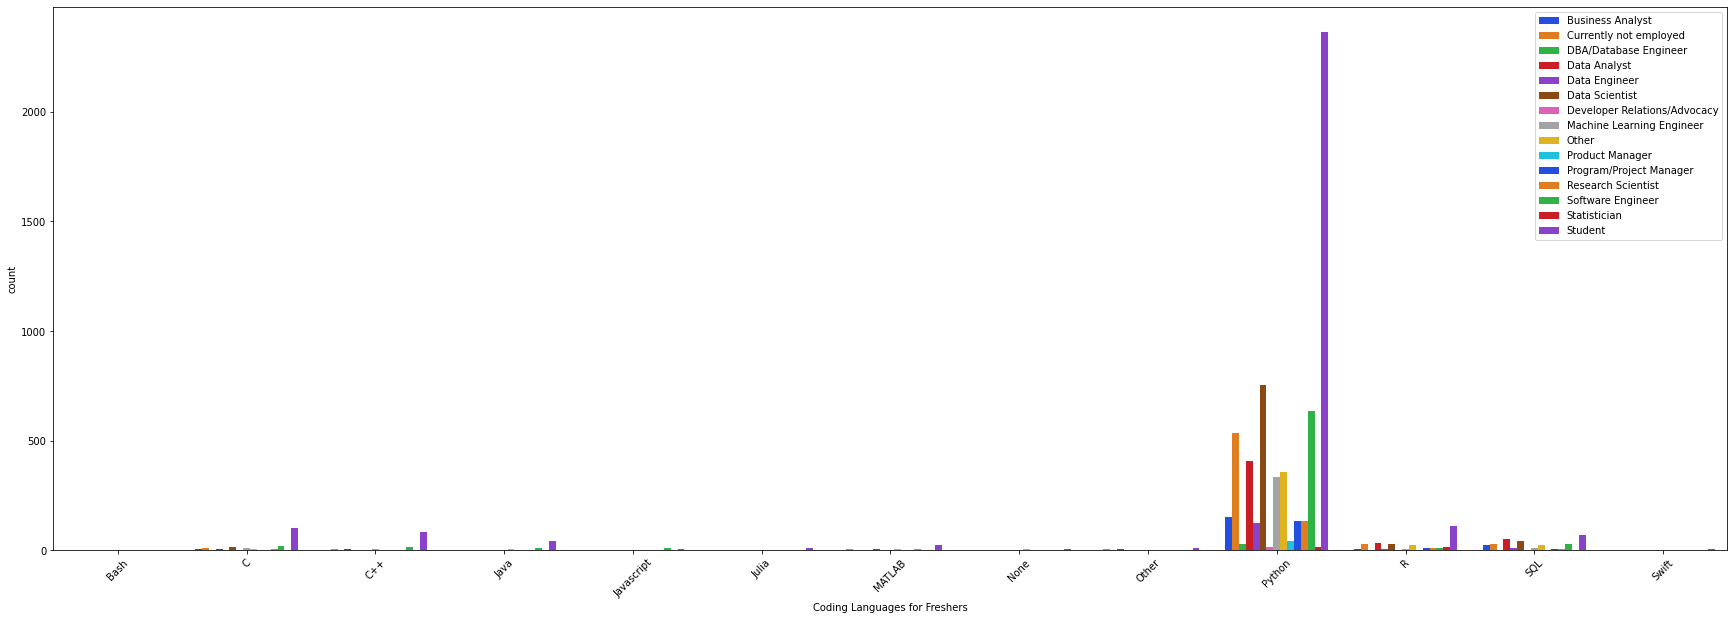

In [10]:
plt.figure(figsize=(30,10))
sns.countplot(data=df_india, x='Coding_lang_Newbies',hue='Title',palette='bright',)
plt.xticks(rotation=45)
plt.xlabel("Coding Languages for Freshers")
plt.legend(loc='upper right')
plt.show()

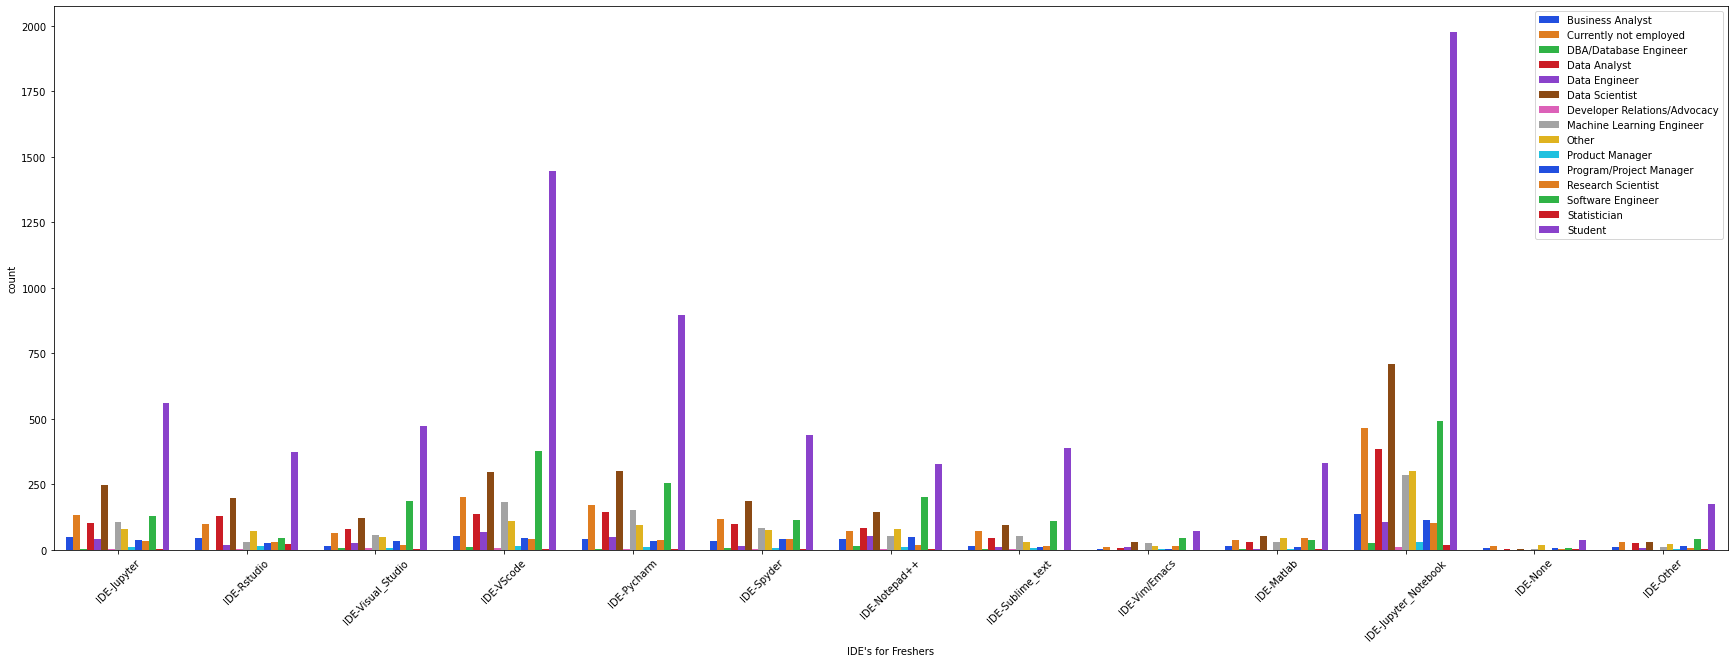

In [11]:
plt.figure(figsize=(30,10))
df_india_1=df_india[["Title","IDE-Jupyter","IDE-Rstudio","IDE-Visual_Studio","IDE-VScode","IDE-Pycharm","IDE-Spyder","IDE-Notepad++","IDE-Sublime_text","IDE-Vim/Emacs","IDE-Matlab","IDE-Jupyter_Notebook","IDE-None","IDE-Other"]]
df_india_1_melted=df_india_1.melt(id_vars=['Title'],var_name='IDE',value_name='Indians')
df_india_1_melted1=df_india_1_melted.dropna(subset=['Indians'])
df_india_1_melted2=df_india_1_melted1.reset_index(drop=True)
sns.countplot(data=df_india_1_melted2, x='IDE', hue='Title',palette="bright")
plt.xticks(rotation=45)
plt.xlabel("IDE's for Freshers")
plt.legend(loc='upper right')
plt.show()

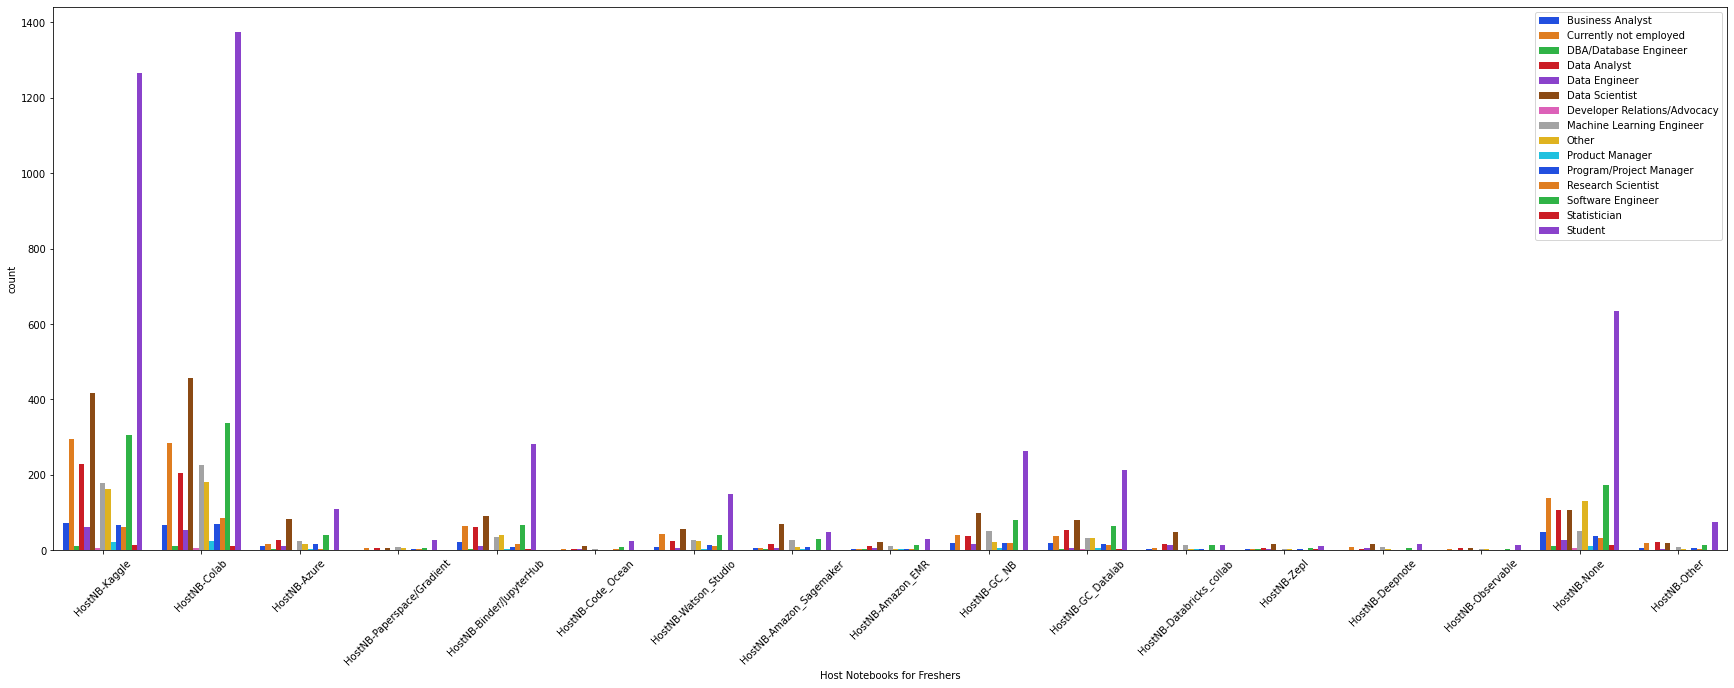

In [12]:
plt.figure(figsize=(30,10))
df_india_2=df_india[["Title","HostNB-Kaggle","HostNB-Colab","HostNB-Azure","HostNB-Paperspace/Gradient","HostNB-Binder/JupyterHub","HostNB-Code_Ocean","HostNB-Watson_Studio","HostNB-Amazon_Sagemaker","HostNB-Amazon_EMR","HostNB-GC_NB","HostNB-GC_Datalab","HostNB-Databricks_collab","HostNB-Zepl","HostNB-Deepnote","HostNB-Observable","HostNB-None","HostNB-Other"]]
df_india_2_melted=df_india_2.melt(id_vars=['Title'],var_name='Host NB',value_name='Indians')
df_india_2_melted1=df_india_2_melted.dropna(subset=['Indians'])
df_india_2_melted2=df_india_2_melted1.reset_index(drop=True)
sns.countplot(data=df_india_2_melted2, x='Host NB', hue='Title',palette="bright")
plt.xticks(rotation=45)
plt.xlabel("Host Notebooks for Freshers")
plt.legend(loc='upper right')
plt.show()

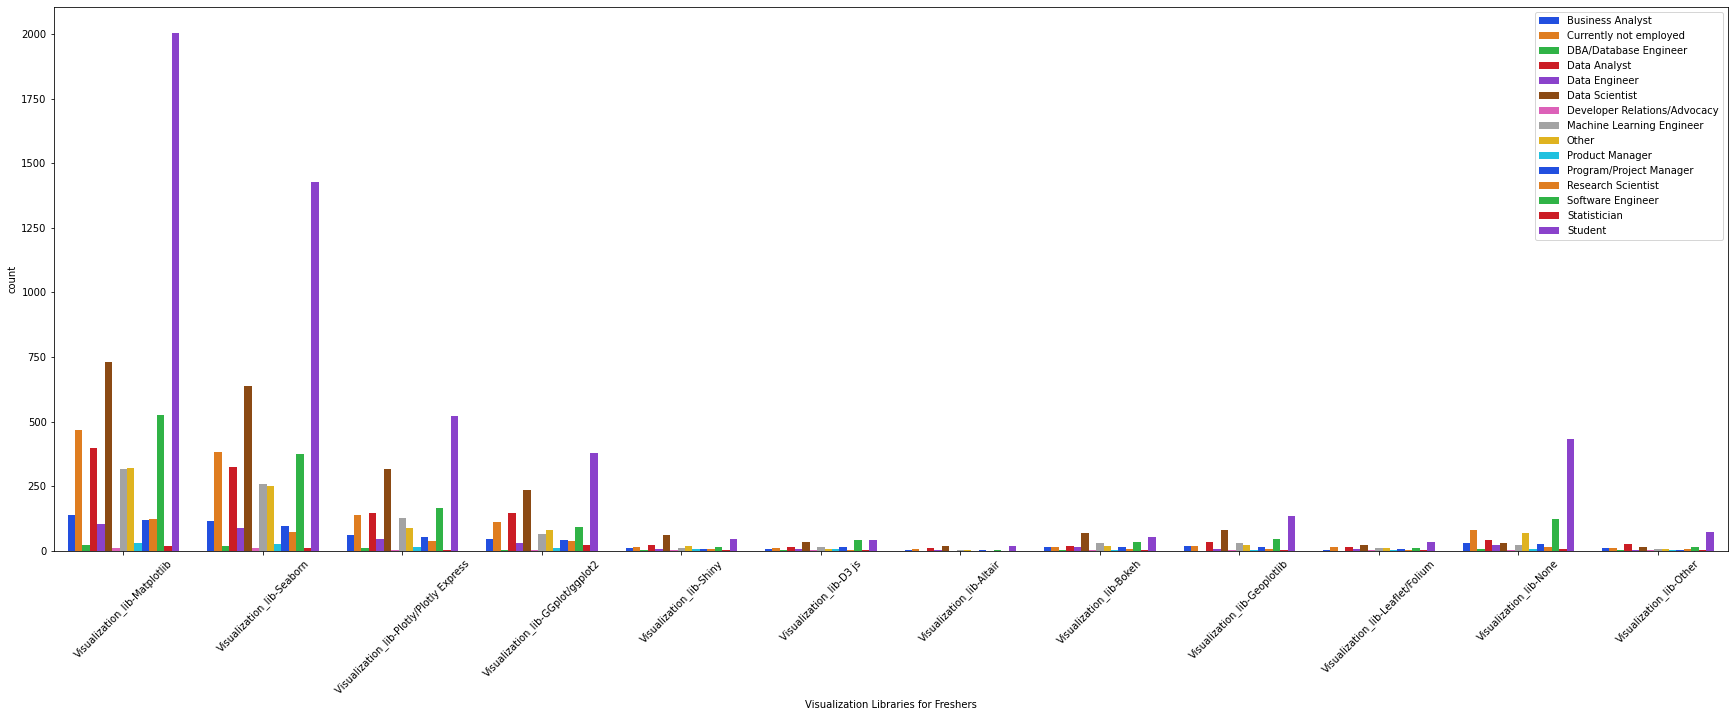

In [13]:
plt.figure(figsize=(30,10))
df_india_3=df_india[["Title","Visualization_lib-Matplotlib","Visualization_lib-Seaborn","Visualization_lib-Plotly/Plotly Express","Visualization_lib-GGplot/ggplot2","Visualization_lib-Shiny","Visualization_lib-D3 js","Visualization_lib-Altair","Visualization_lib-Bokeh","Visualization_lib-Geoplotlib","Visualization_lib-Leaflet/Folium","Visualization_lib-None","Visualization_lib-Other"]]
df_india_3_melted=df_india_3.melt(id_vars=['Title'],var_name='VISUALISATION LIBRARY',value_name='Indians')
df_india_3_melted1=df_india_3_melted.dropna(subset=['Indians'])
df_india_3_melted2=df_india_3_melted1.reset_index(drop=True)
sns.countplot(data=df_india_3_melted2, x='VISUALISATION LIBRARY', hue='Title',palette='bright')
plt.xticks(rotation=45)
plt.xlabel("Visualization Libraries for Freshers")
plt.legend(loc='upper right')
plt.show()

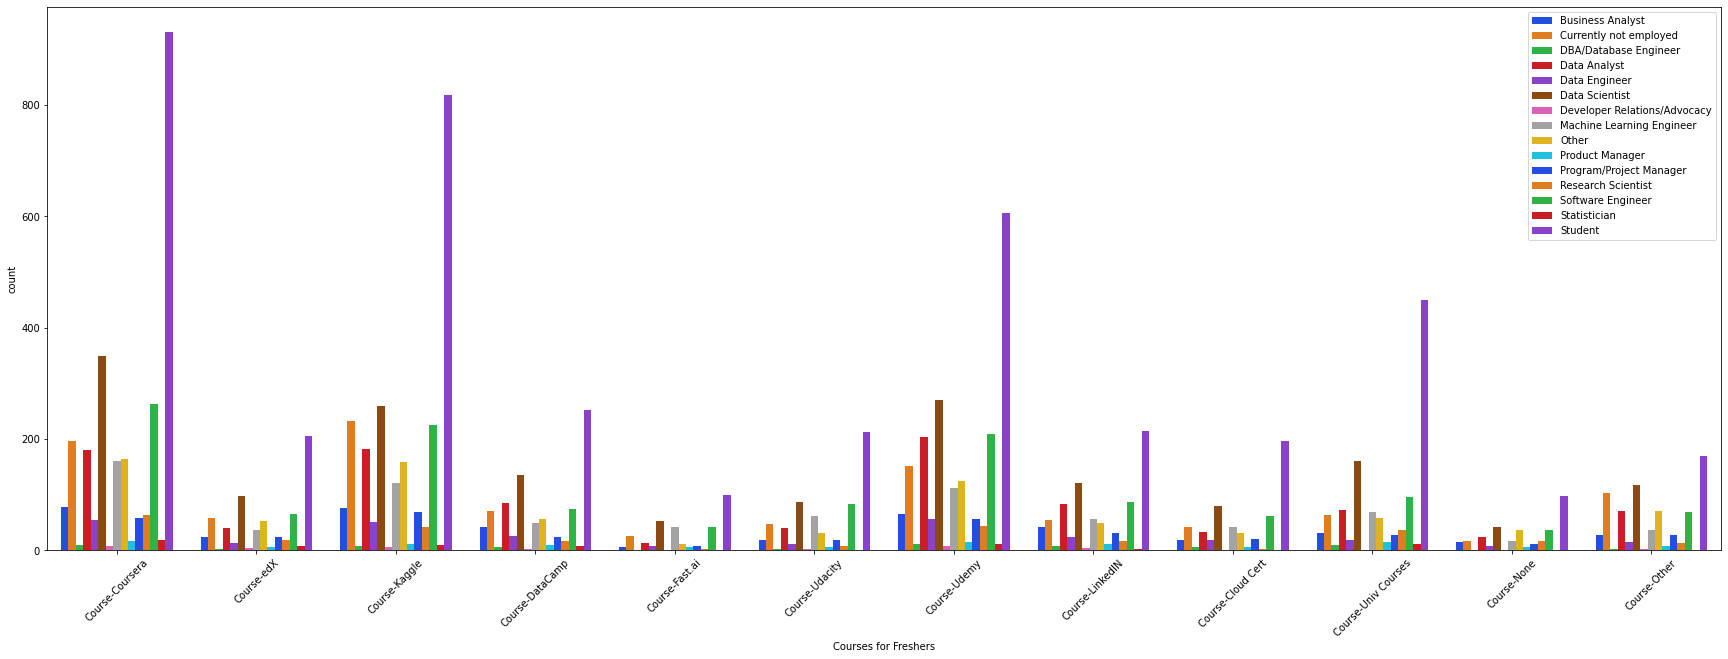

In [14]:
plt.figure(figsize=(30,10))
df_india_4=df_india[["Title","Course-Coursera","Course-edX","Course-Kaggle","Course-DataCamp","Course-Fast.ai","Course-Udacity","Course-Udemy","Course-LinkedIN","Course-Cloud Cert","Course-Univ Courses","Course-None","Course-Other"]]
df_india_4_melted=df_india_4.melt(id_vars=['Title'],var_name='Courses',value_name='Indians')
df_india_4_melted1=df_india_4_melted.dropna(subset=['Indians'])
df_india_4_melted2=df_india_4_melted1.reset_index(drop=True)
sns.countplot(data=df_india_4_melted2, x='Courses', hue='Title',palette='bright')
plt.xticks(rotation=45)
plt.xlabel("Courses for Freshers")
plt.legend(loc='upper right')

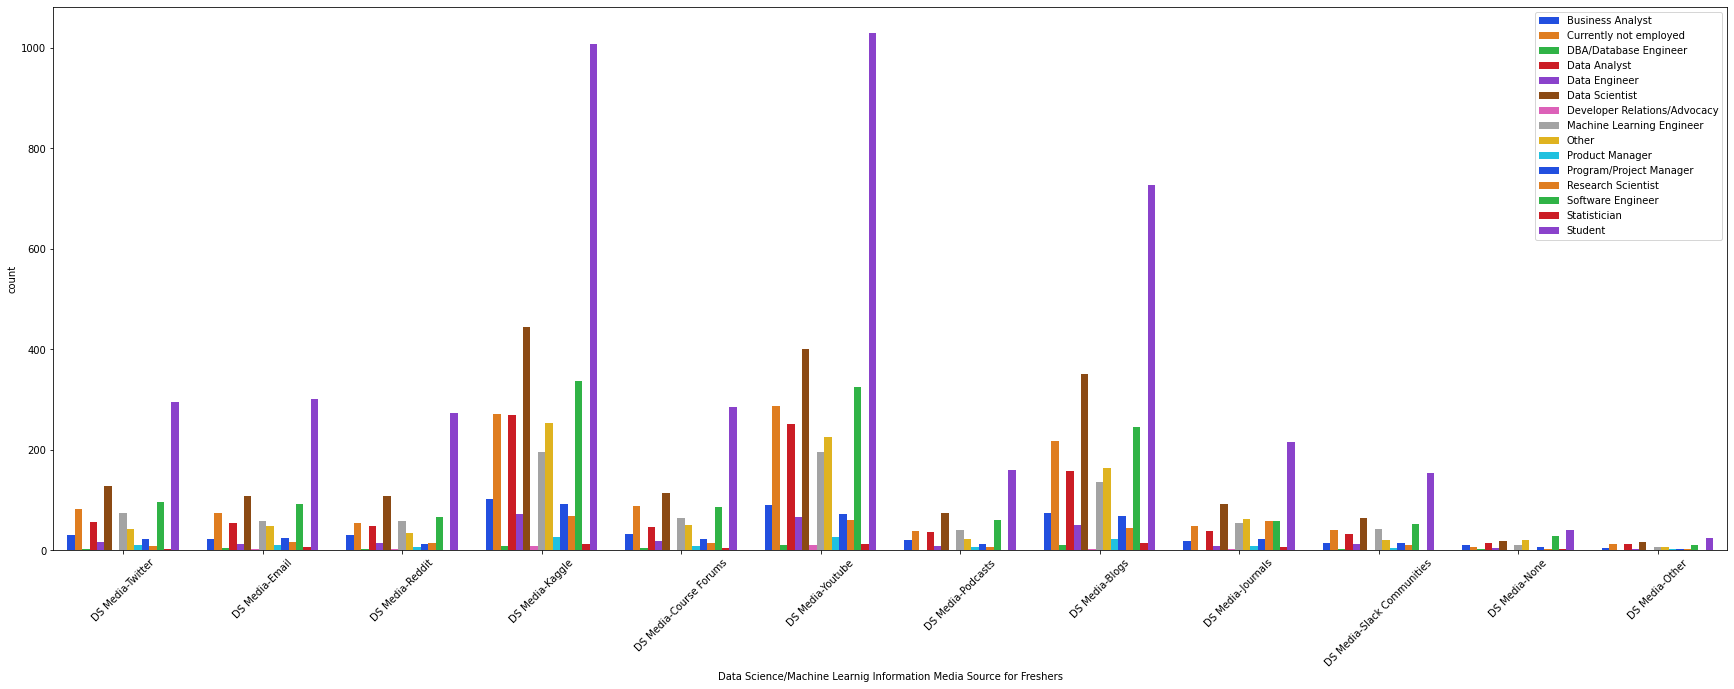

In [15]:
plt.figure(figsize=(30,10))
df_india_5=df_india[["Title","DS Media-Twitter","DS Media-Email","DS Media-Reddit","DS Media-Kaggle","DS Media-Course Forums","DS Media-Youtube","DS Media-Podcasts","DS Media-Blogs","DS Media-Journals","DS Media-Slack Communities","DS Media-None","DS Media-Other"]]
df_india_5_melted=df_india_5.melt(id_vars=['Title'],var_name='DS INFO MEDIA SOURCE',value_name='Indians')
df_india_5_melted1=df_india_5_melted.dropna(subset=['Indians'])
df_india_5_melted2=df_india_5_melted1.reset_index(drop=True)
sns.countplot(data=df_india_5_melted2, x='DS INFO MEDIA SOURCE', hue='Title',palette='bright')
plt.xticks(rotation=45)
plt.xlabel("Data Science/Machine Learnig Information Media Source for Freshers")
plt.legend(loc='upper right')
plt.show()

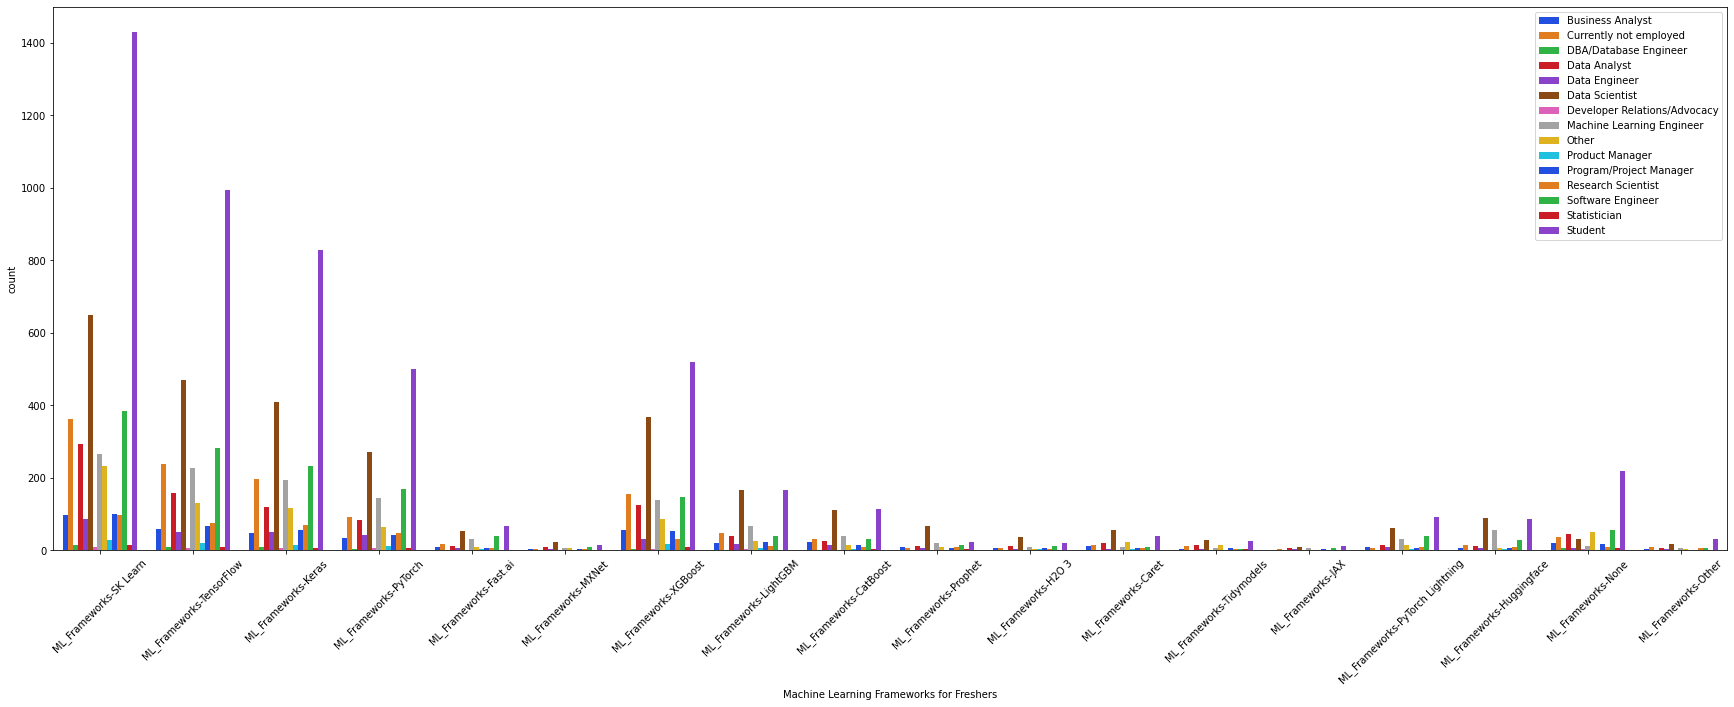

In [16]:
plt.figure(figsize=(30,10))
df_india_6=df_india[["Title","ML_Frameworks-SK Learn","ML_Frameworks-TensorFlow","ML_Frameworks-Keras","ML_Frameworks-PyTorch","ML_Frameworks-Fast.ai","ML_Frameworks-MXNet","ML_Frameworks-XGBoost","ML_Frameworks-LightGBM","ML_Frameworks-CatBoost","ML_Frameworks-Prophet","ML_Frameworks-H2O 3","ML_Frameworks-Caret","ML_Frameworks-Tidymodels","ML_Frameworks-JAX","ML_Frameworks-PyTorch Lightning","ML_Frameworks-Huggingface","ML_Frameworks-None","ML_Frameworks-Other"]]
df_india_6_melted=df_india_6.melt(id_vars=['Title'],var_name='ML FRAMEWORKS',value_name='Indians')
df_india_6_melted1=df_india_6_melted.dropna(subset=['Indians'])
df_india_6_melted2=df_india_6_melted1.reset_index(drop=True)
sns.countplot(data=df_india_6_melted2, x='ML FRAMEWORKS', hue='Title',palette='bright')
plt.xticks(rotation=45)
plt.xlabel("Machine Learning Frameworks for Freshers")
plt.legend(loc='upper right')
plt.show()

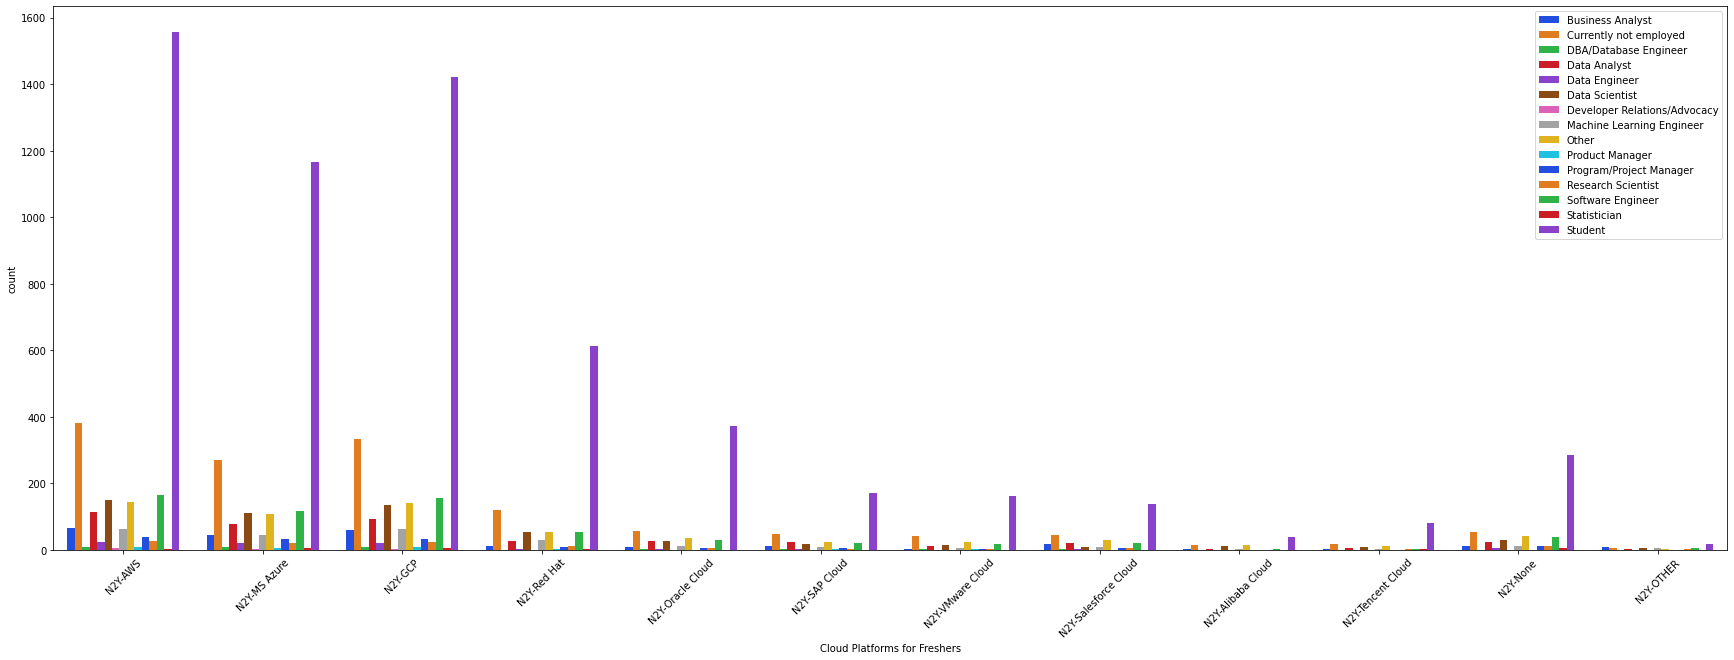

In [17]:
plt.figure(figsize=(30,10))
df_india_6=df_india[["Title","N2Y-AWS","N2Y-MS Azure","N2Y-GCP","N2Y-Red Hat","N2Y-Oracle Cloud","N2Y-SAP Cloud","N2Y-VMware Cloud","N2Y-Salesforce Cloud","N2Y-Alibaba Cloud","N2Y-Tencent Cloud","N2Y-None","N2Y-OTHER"]]
df_india_6_melted=df_india_6.melt(id_vars=['Title'],var_name='CLOUD PLATFORM TO BECOME FAMILIAR WITH IN NEXT 2 YEARS',value_name='Indians')
df_india_6_melted1=df_india_6_melted.dropna(subset=['Indians'])
df_india_6_melted2=df_india_6_melted1.reset_index(drop=True)
sns.countplot(data=df_india_6_melted2, x='CLOUD PLATFORM TO BECOME FAMILIAR WITH IN NEXT 2 YEARS', hue='Title',palette='bright')
plt.xticks(rotation=45)
plt.xlabel("Cloud Platforms for Freshers")
plt.legend(loc='upper right')
plt.show()

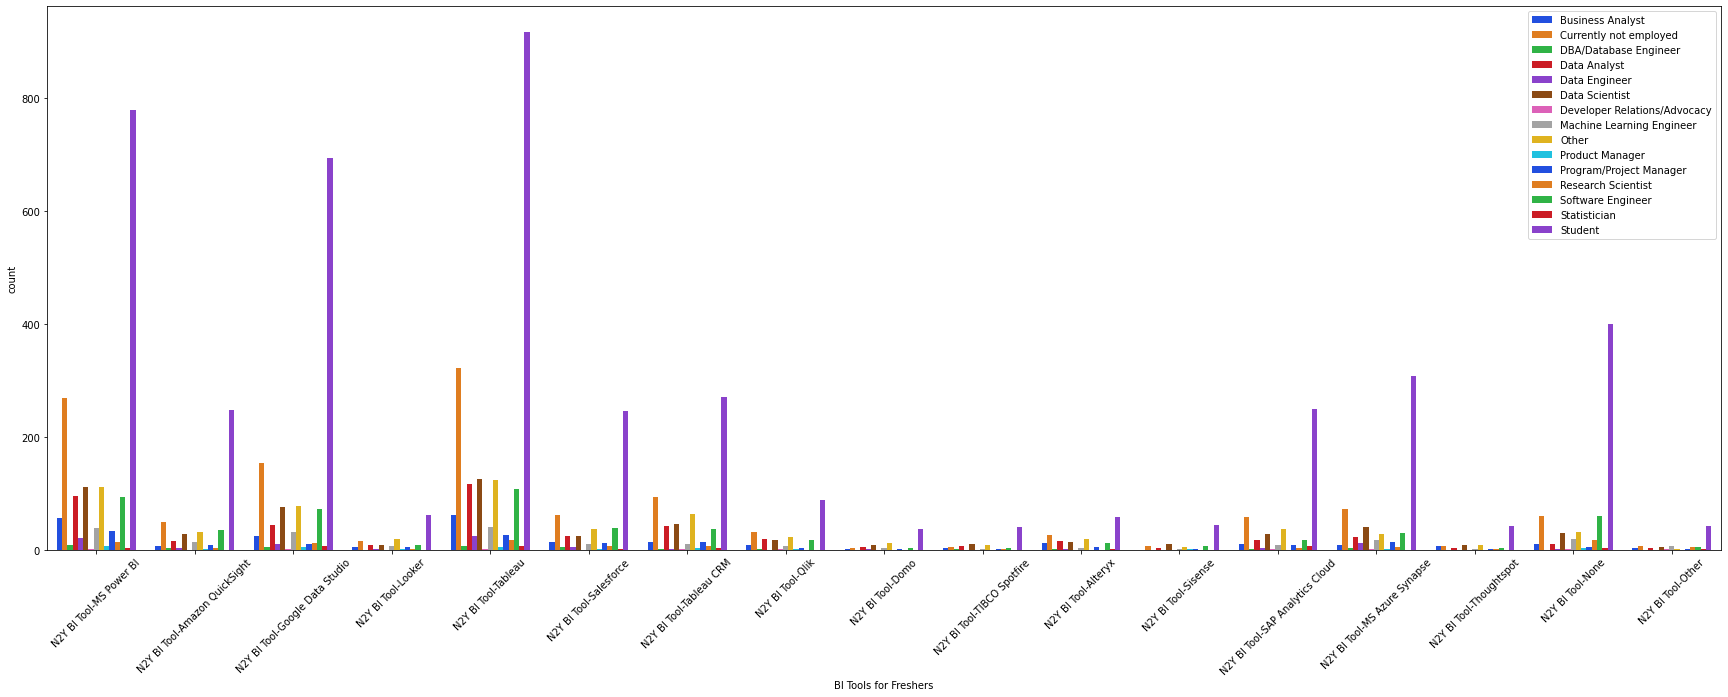

In [18]:
plt.figure(figsize=(30,10))
df_india_7=df_india[["Title","N2Y BI Tool-MS Power BI","N2Y BI Tool-Amazon QuickSight","N2Y BI Tool-Google Data Studio","N2Y BI Tool-Looker","N2Y BI Tool-Tableau","N2Y BI Tool-Salesforce","N2Y BI Tool-Tableau CRM","N2Y BI Tool-Qlik","N2Y BI Tool-Domo","N2Y BI Tool-TIBCO Spotfire","N2Y BI Tool-Alteryx","N2Y BI Tool-Sisense","N2Y BI Tool-SAP Analytics Cloud","N2Y BI Tool-MS Azure Synapse","N2Y BI Tool-Thoughtspot","N2Y BI Tool-None","N2Y BI Tool-Other"]]
df_india_7_melted=df_india_7.melt(id_vars=['Title'],var_name='POPULAR BI Tool IN NEXT 2 YEARS',value_name='Indians')
df_india_7_melted1=df_india_7_melted.dropna(subset=['Indians'])
df_india_7_melted2=df_india_7_melted1.reset_index(drop=True)
sns.countplot(data=df_india_7_melted2, x='POPULAR BI Tool IN NEXT 2 YEARS', hue='Title',palette='bright')
plt.xticks(rotation=45)
plt.xlabel("BI Tools for Freshers")
plt.legend(loc='upper right')
plt.show()

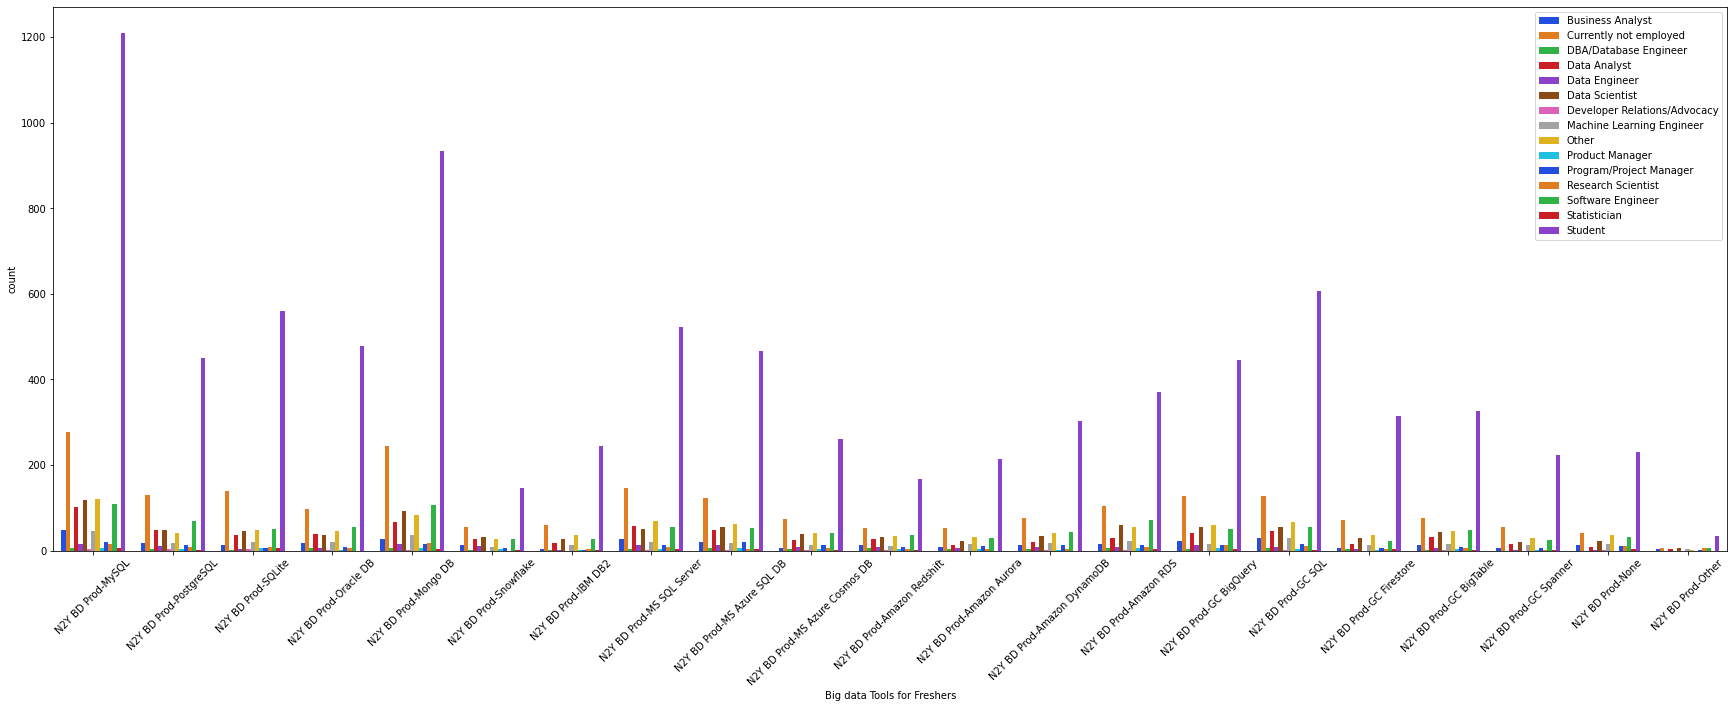

In [19]:
plt.figure(figsize=(30,10))
df_india_8=df_india[["Title","N2Y BD Prod-MySQL","N2Y BD Prod-PostgreSQL","N2Y BD Prod-SQLite","N2Y BD Prod-Oracle DB","N2Y BD Prod-Mongo DB","N2Y BD Prod-Snowflake","N2Y BD Prod-IBM DB2","N2Y BD Prod-MS SQL Server","N2Y BD Prod-MS Azure SQL DB","N2Y BD Prod-MS Azure Cosmos DB","N2Y BD Prod-Amazon Redshift","N2Y BD Prod-Amazon Aurora","N2Y BD Prod-Amazon DynamoDB","N2Y BD Prod-Amazon RDS","N2Y BD Prod-GC BigQuery","N2Y BD Prod-GC SQL","N2Y BD Prod-GC Firestore","N2Y BD Prod-GC BigTable","N2Y BD Prod-GC Spanner","N2Y BD Prod-None","N2Y BD Prod-Other"]]
df_india_8_melted=df_india_8.melt(id_vars=['Title'],var_name='LEARNING BIG DATA TOOLS IN NEXT 2 YEARS',value_name='Indians')
df_india_8_melted1=df_india_8_melted.dropna(subset=['Indians'])
df_india_8_melted2=df_india_8_melted1.reset_index(drop=True)
sns.countplot(data=df_india_8_melted2, x='LEARNING BIG DATA TOOLS IN NEXT 2 YEARS', hue='Title',palette='bright')
plt.xticks(rotation=45)
plt.xlabel("Big data Tools for Freshers")
plt.legend(loc='upper right')

## **Data Preprocessing - Job Prospects**

In [20]:
df_ai = pd.read_csv('AIjobs.csv')
df_ai.head()

,Unnamed: 0,Title,Company,Location,Salary,Details
0,0,"Software Developer (Artificial intelligence, J...",GEM Techsoft Private limited,"Hyderabad, Telangana","₹3,00,000 - ₹8,00,000 a year",management: 1 year (Preferred) Bachelor's (Req...
1,1,"Data Science Engineer,SMART MFG & AI",Micron,"Hyderabad, Telangana",NaN,Draw from a broad background of data-mining te...
2,2,Artificial Intelligence / Machine Learning Eng...,Healthcoco Technologies,"Pune, Maharashtra",NaN,NaN
3,3,"Software Engineer, University Graduate, 2021 S...",Google,"Bengaluru, Karnataka",NaN,Bachelor's degree or equivalent practical expe...
4,4,AI (Artificial Intelligence) Expert,Realto Tech,"Hyderabad, Telangana","₹50,000 - ₹75,000 a month",Lead efforts to establish the company as an AI...


In [21]:
df_ai.drop(['Unnamed: 0'],axis=1,inplace=True)
df_ai.head()

,Title,Company,Location,Salary,Details
0,"Software Developer (Artificial intelligence, J...",GEM Techsoft Private limited,"Hyderabad, Telangana","₹3,00,000 - ₹8,00,000 a year",management: 1 year (Preferred) Bachelor's (Req...
1,"Data Science Engineer,SMART MFG & AI",Micron,"Hyderabad, Telangana",NaN,Draw from a broad background of data-mining te...
2,Artificial Intelligence / Machine Learning Eng...,Healthcoco Technologies,"Pune, Maharashtra",NaN,NaN
3,"Software Engineer, University Graduate, 2021 S...",Google,"Bengaluru, Karnataka",NaN,Bachelor's degree or equivalent practical expe...
4,AI (Artificial Intelligence) Expert,Realto Tech,"Hyderabad, Telangana","₹50,000 - ₹75,000 a month",Lead efforts to establish the company as an AI...


In [22]:
df_ai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     733 non-null    object
 1   Company   733 non-null    object
 2   Location  733 non-null    object
 3   Salary    97 non-null     object
 4   Details   564 non-null    object
dtypes: object(5)
memory usage: 28.8+ KB


In [23]:
LC = []
for i in range(0,733):
  LC.append(df_ai['Location'][i].split(',')[0])
df_ai.insert(3,'LocationCity',LC,True)
df_ai.head()

,Title,Company,Location,LocationCity,Salary,Details
0,"Software Developer (Artificial intelligence, J...",GEM Techsoft Private limited,"Hyderabad, Telangana",Hyderabad,"₹3,00,000 - ₹8,00,000 a year",management: 1 year (Preferred) Bachelor's (Req...
1,"Data Science Engineer,SMART MFG & AI",Micron,"Hyderabad, Telangana",Hyderabad,NaN,Draw from a broad background of data-mining te...
2,Artificial Intelligence / Machine Learning Eng...,Healthcoco Technologies,"Pune, Maharashtra",Pune,NaN,NaN
3,"Software Engineer, University Graduate, 2021 S...",Google,"Bengaluru, Karnataka",Bengaluru,NaN,Bachelor's degree or equivalent practical expe...
4,AI (Artificial Intelligence) Expert,Realto Tech,"Hyderabad, Telangana",Hyderabad,"₹50,000 - ₹75,000 a month",Lead efforts to establish the company as an AI...


In [24]:
df_ai_1 = df_ai[['LocationCity']]
df_ai_1

,LocationCity
0,Hyderabad
1,Hyderabad
2,Pune
3,Bengaluru
4,Hyderabad
...,...
728,Bengaluru
729,Bengaluru
730,Bengaluru
731,Bengaluru


In [25]:
df_cjd1 = pd.read_csv('CJD_new.csv')
df_cjd1

,Job.Title,Job.Description,Rating,Company.Name,Location,Headquarters,Size,Founded,Type.of.ownership,Industry,Sector,Revenue,Competitors,Python,R Prog,Excel,Hadoop,SQL,SAS
0,Data Scientist,Site Name: India - Karnataka - Bangalore\r\nPo...,3.9,GSK,Bengaluru,"Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,500+ billion (INR),"Pfizer, AstraZeneca, Merck",1,0,0,1,0,0
1,Data Scientist,Overview\r\n\r\n\r\nWe have an exciting opport...,4.0,Quanticate,Bengaluru,"Hitchin, United Kingdom",201 to 500 employees,1995,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,1 to 5 billion (INR),"GCE Solutions, Parexel, IQVIA",1,0,0,0,0,1
2,Data Scientist,Provide analytical insights into emerging prob...,3.5,PayPal,Bengaluru,"San Jose, CA",10000+ employees,1998,Company - Public,Internet,Information Technology,500+ billion (INR),"Square, Amazon, Apple",1,0,0,0,1,1
3,Data Scientist,"At Amazon, we strive to be most customer-centr...",4.2,Amazon,Hyderabad,"Seattle, WA",10000+ employees,1994,Company - Public,Internet,Information Technology,500+ billion (INR),"Google, Microsoft, Walmart",1,0,1,0,1,0
4,Data Scientist,"When everything's connected, how we connect is...",3.3,TTEC,Hyderabad,"Englewood, CO",10000+ employees,1982,Company - Public,Staffing & Outsourcing,Business Services,100 to 500 billion (INR),"Teleperformance, TaskUs, Convergys",1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,Data Scientist,Position: Research Associate / Scientist\r\n\r...,4.7,String Bio,Bengaluru,"Bengaluru, India",1 to 50 employees,-1,Company - Private,-1,-1,-1,-1,0,0,1,0,0,0
881,Data Scientist,Role and responsibilities:\r\nMost of the expe...,4.3,Think Analytics India,Mumbai,"Mumbai, India",1 to 50 employees,-1,Company - Private,-1,-1,-1,-1,0,0,0,0,0,1
882,Data Scientist,Understand the project requirements and delive...,-1.0,WDB Inida Private Limited,Hyderabad,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0
883,Data Scientist,Worlds largest investment bank is looking to s...,4.0,The Edge Asia,Mumbai,"Hong Kong, Hong Kong",1 to 50 employees,2013,Company - Private,Staffing & Outsourcing,Business Services,-1,-1,1,0,0,0,0,0


In [26]:
df_cjd1.rename(columns = {'Location':'LocationCity','Job.Title':'Title','Company.Name':'Company'}, inplace = True)
df_cjd1_1 = df_cjd1[['LocationCity']]
df_cjd1_1

,LocationCity
0,Bengaluru
1,Bengaluru
2,Bengaluru
3,Hyderabad
4,Hyderabad
...,...
880,Bengaluru
881,Mumbai
882,Hyderabad
883,Mumbai


# Plot Preparation

In [27]:
df_tot = pd.concat([df_ai_1, df_cjd1_1], ignore_index=True)
df_tot['LocationCity'] = df_tot.replace('-1','Others')

In [28]:
df_sector = df_cjd1[['Title','Sector']]
df_sector = df_sector.replace(to_replace = '-1', value = np.nan)
df_sector.dropna(axis=0,inplace=True)
df_sector.isna().sum()

Title     0
Sector    0
dtype: int64

In [29]:
df_owner = df_cjd1[['Title','Type.of.ownership']]
df_owner = df_owner.replace(to_replace = '-1', value = np.nan)
df_owner.dropna(axis=0,inplace=True)
df_owner.isna().sum()

Title                0
Type.of.ownership    0
dtype: int64

In [30]:
df_size = df_cjd1[['Title','Size']]
df_size = df_size.replace(to_replace = '-1', value = np.nan)
df_size.dropna(axis=0,inplace=True)
df_size.isna().sum()

Title    0
Size     0
dtype: int64

In [31]:
df_industry = df_cjd1[['Title','Industry']]
df_industry = df_industry.replace(to_replace = '-1', value = np.nan)
df_industry.dropna(axis=0,inplace=True)
df_industry.isna().sum()

Title       0
Industry    0
dtype: int64

## **Job Market Segmentation**

In [32]:
fig = px.pie(df_tot, 'LocationCity', title="Job Market Segmentation wrt Location", hole=0.5)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

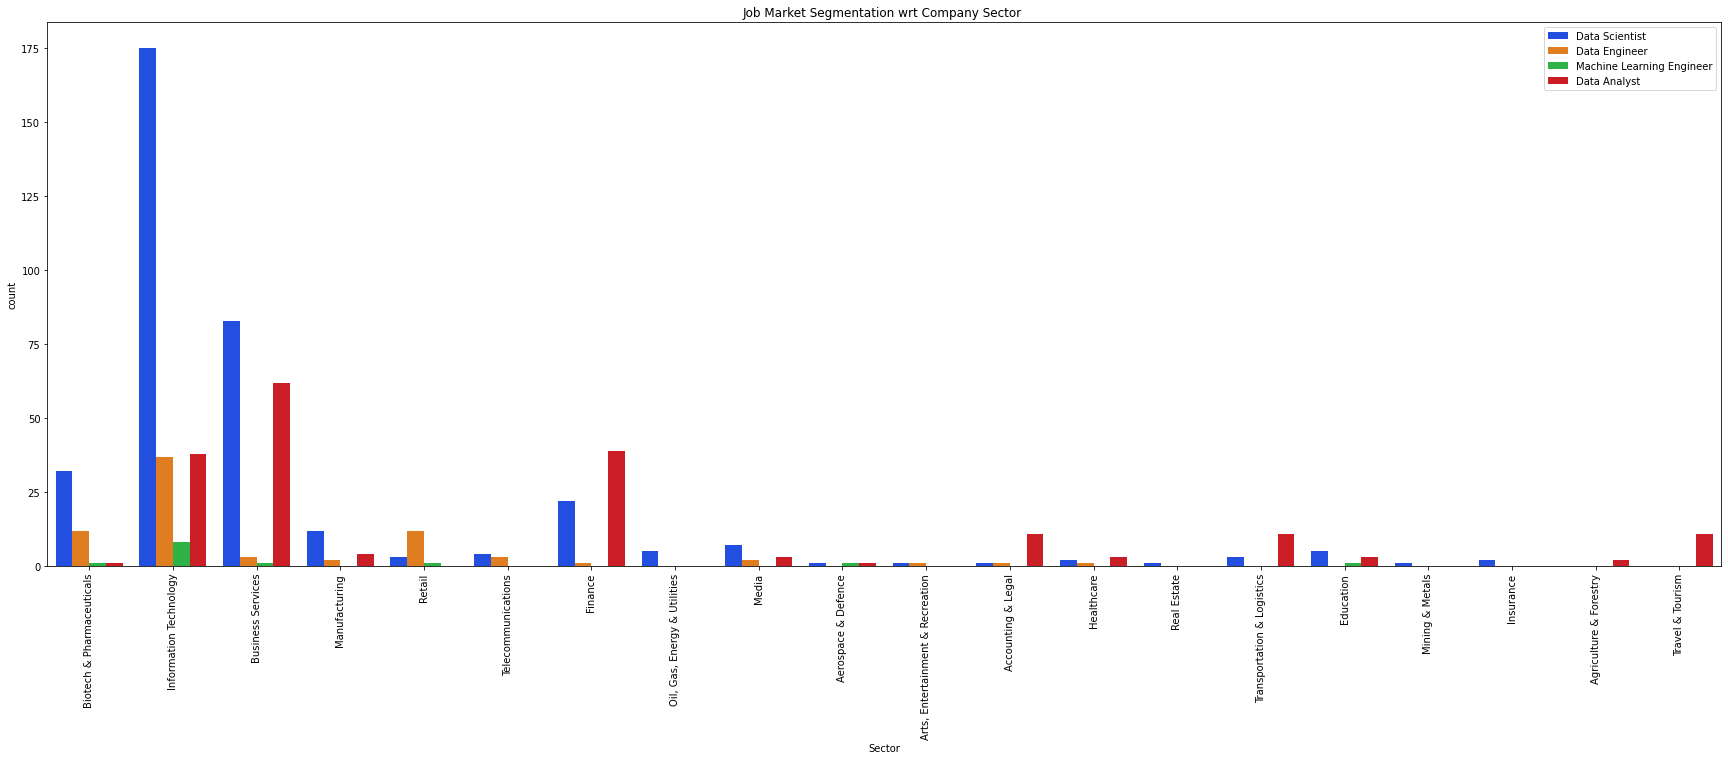

In [33]:
plt.figure(figsize=(30,10))
sns.countplot(x='Sector',hue='Title', data=df_sector,palette='bright')
plt.title("Job Market Segmentation wrt Company Sector ")
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

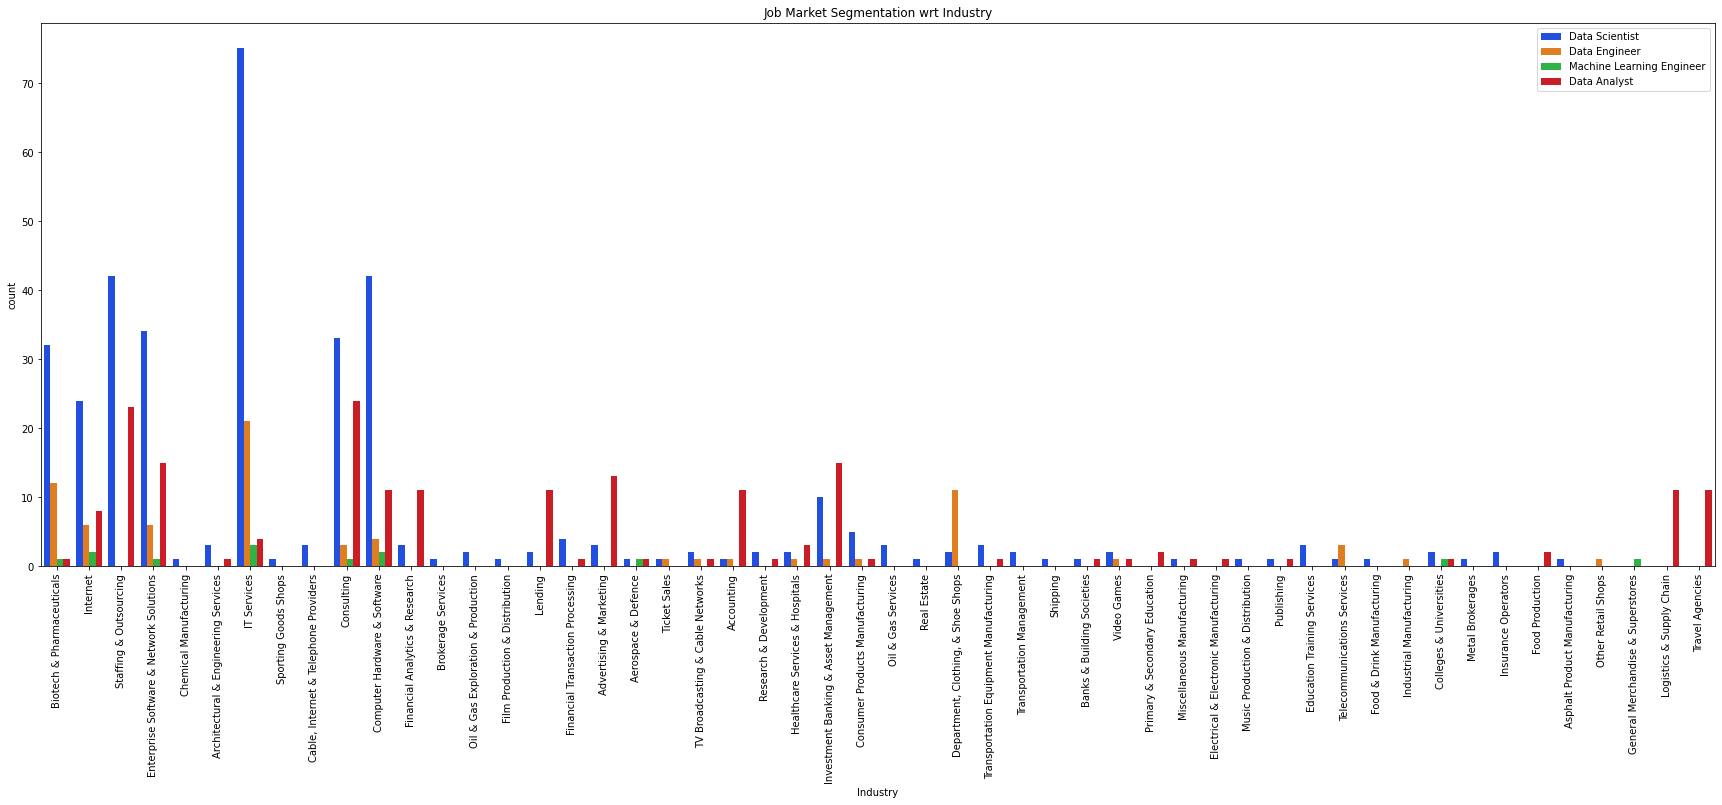

In [34]:
plt.figure(figsize=(30,10))
sns.countplot(x='Industry',hue='Title', data=df_industry,palette='bright')
plt.title("Job Market Segmentation wrt Industry")
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

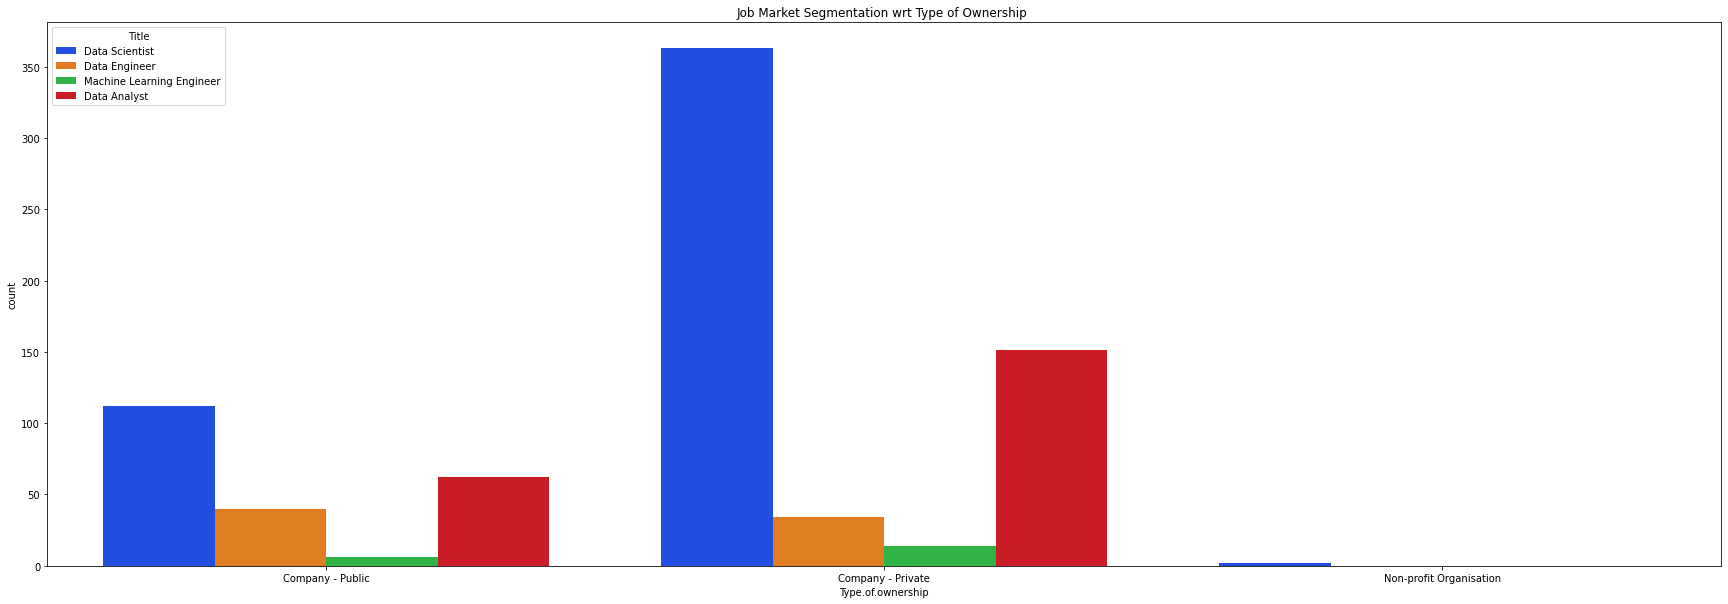

In [35]:
plt.figure(figsize=(30,10))
sns.countplot(x='Type.of.ownership',hue='Title', data=df_owner,palette='bright')
plt.title("Job Market Segmentation wrt Type of Ownership ")
plt.show()

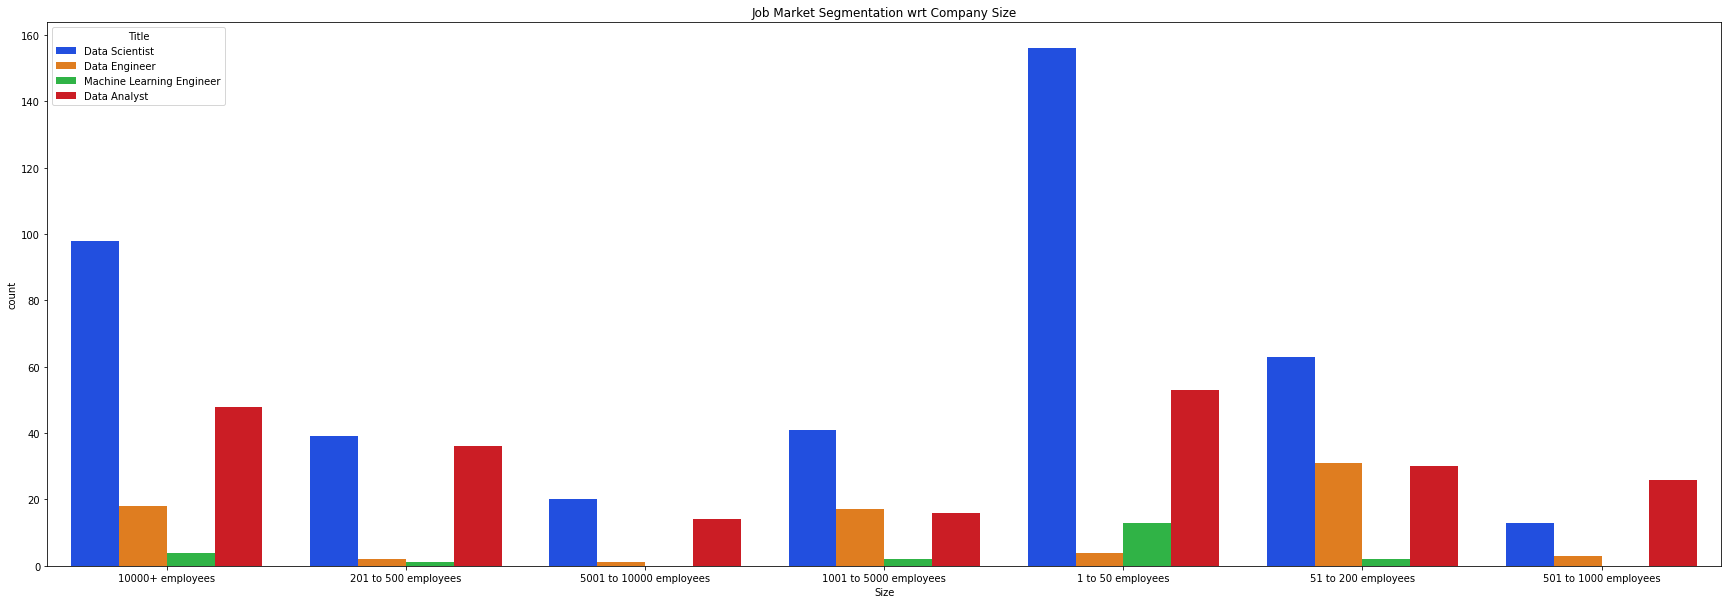

In [36]:
plt.figure(figsize=(30,10))
sns.countplot(x='Size',hue='Title', data=df_size,palette='bright')
plt.title("Job Market Segmentation wrt Company Size")
plt.show()

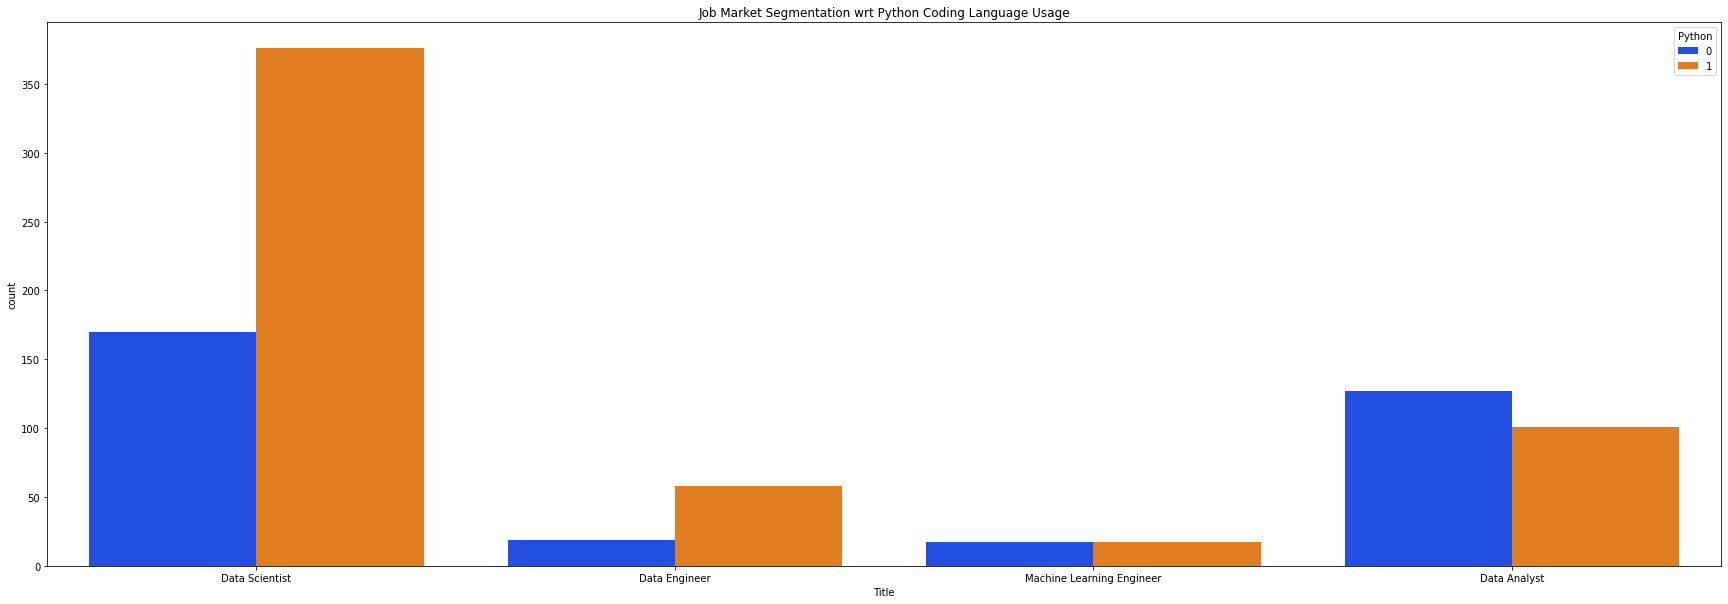

In [37]:
plt.figure(figsize=(30,10))
sns.countplot(x='Title',hue='Python', data=df_cjd1,palette='bright')
plt.title("Job Market Segmentation wrt Python Coding Language Usage")
plt.show()

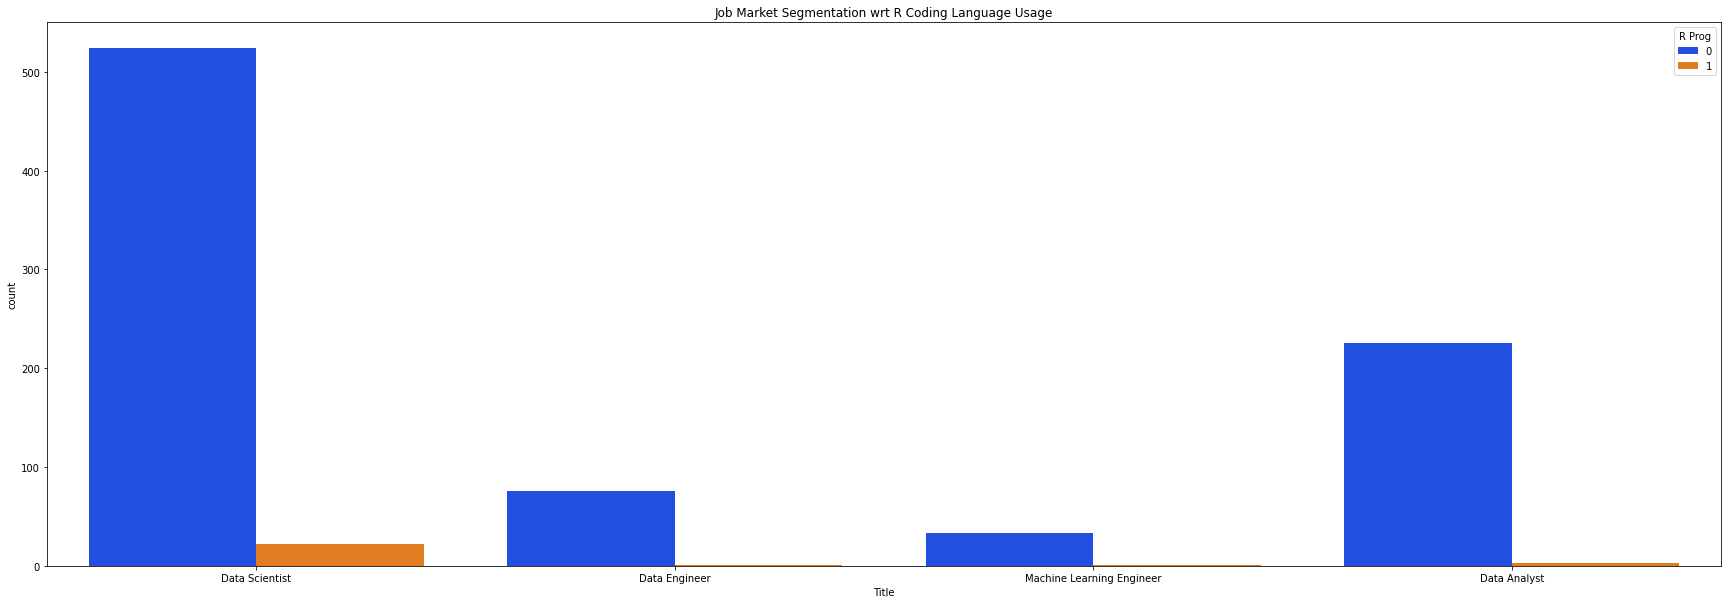

In [38]:
plt.figure(figsize=(30,10))
sns.countplot(x='Title',hue='R Prog', data=df_cjd1,palette='bright')
plt.title("Job Market Segmentation wrt R Coding Language Usage")
plt.show()

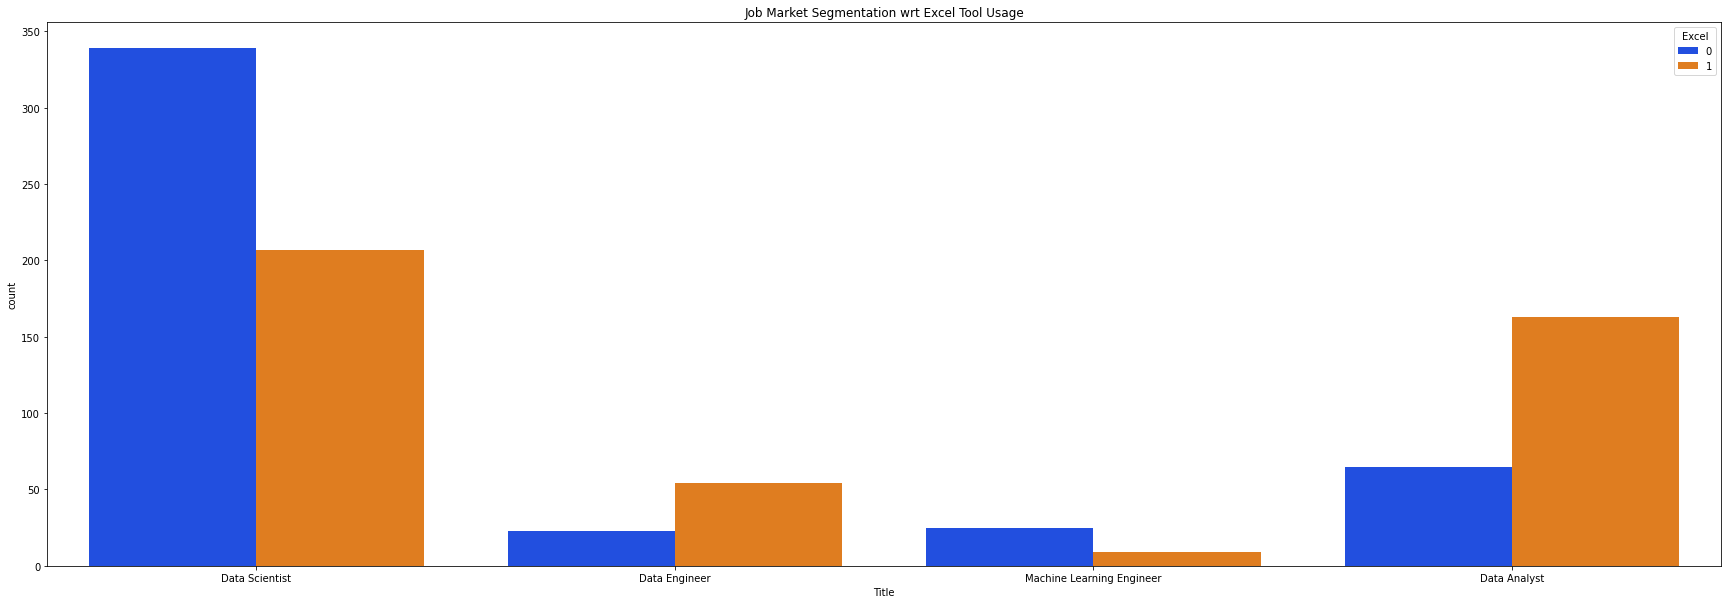

In [39]:
plt.figure(figsize=(30,10))
sns.countplot(x='Title',hue='Excel', data=df_cjd1,palette='bright')
plt.title("Job Market Segmentation wrt Excel Tool Usage")
plt.show()

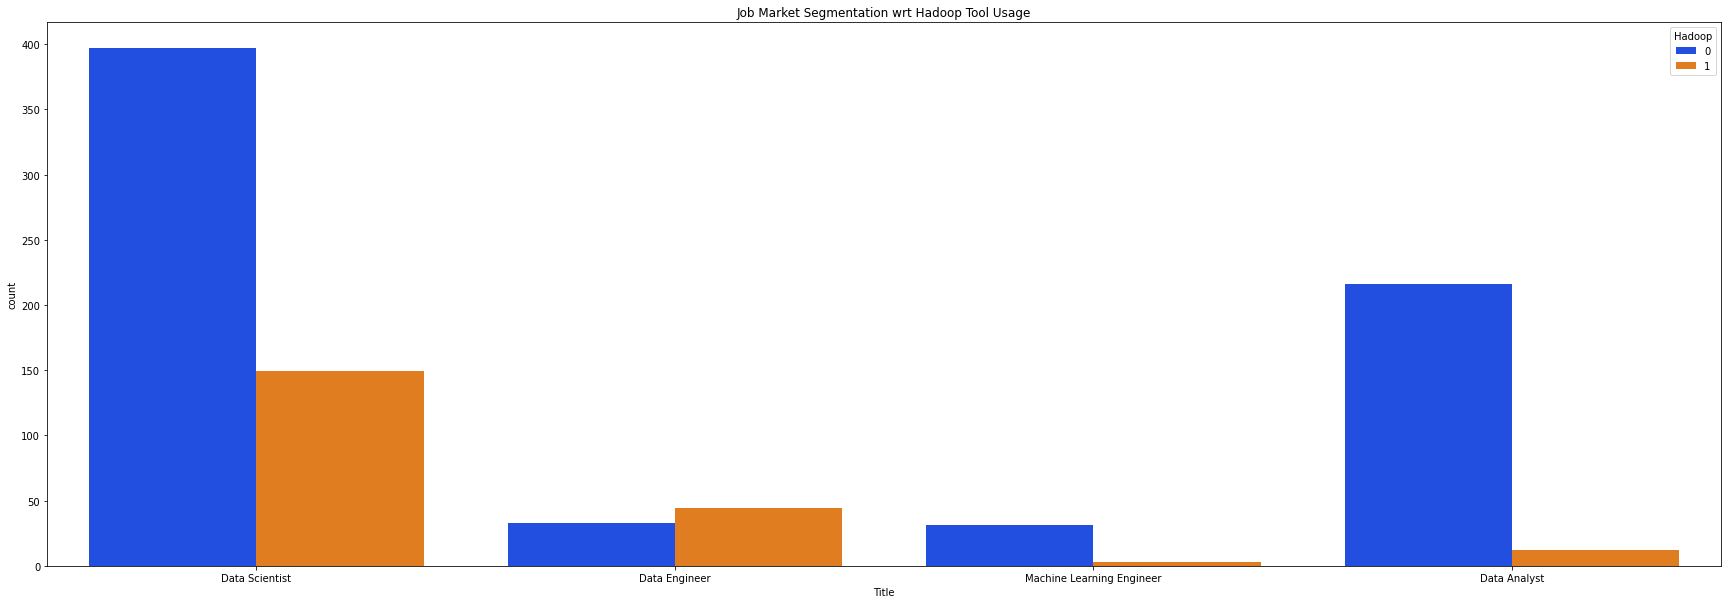

In [40]:
plt.figure(figsize=(30,10))
sns.countplot(x='Title',hue='Hadoop', data=df_cjd1,palette='bright')
plt.title("Job Market Segmentation wrt Hadoop Tool Usage")
plt.show()

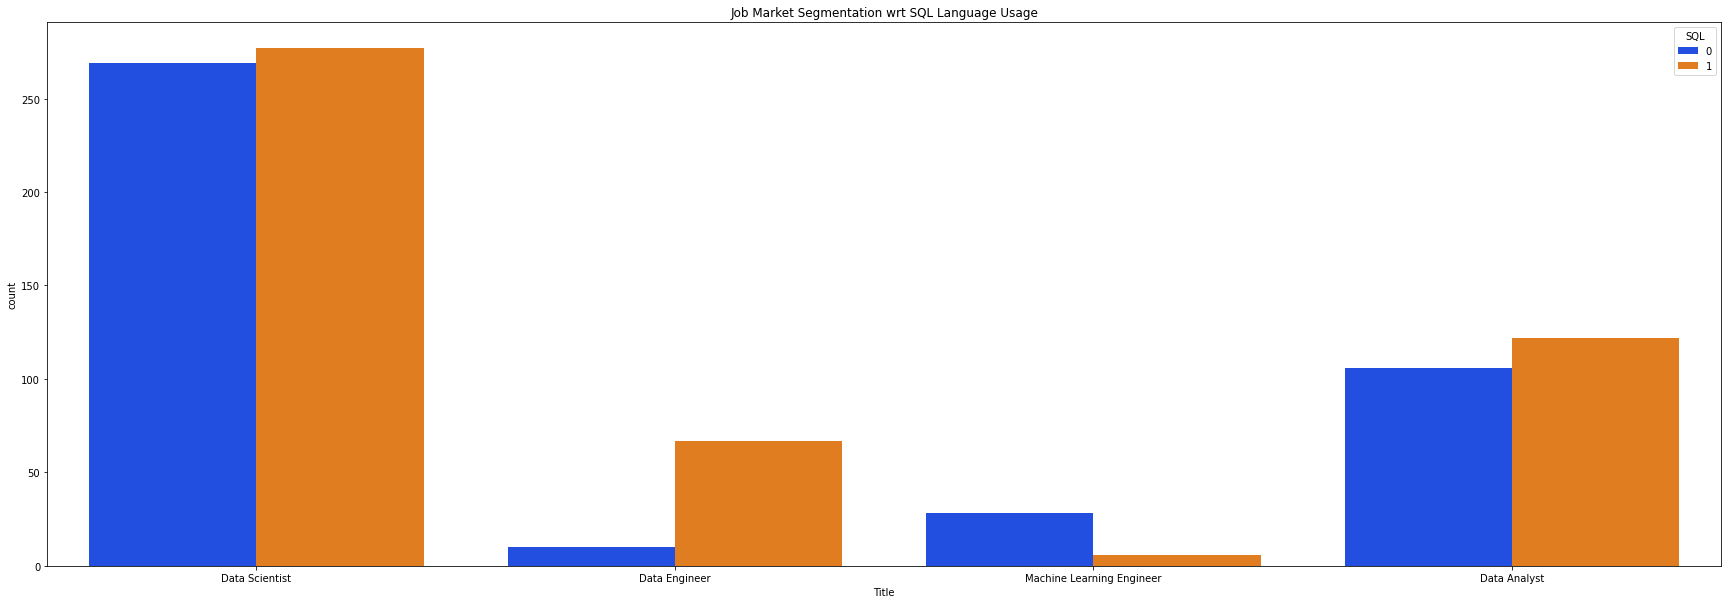

In [41]:
plt.figure(figsize=(30,10))
sns.countplot(x='Title',hue='SQL', data=df_cjd1,palette='bright')
plt.title("Job Market Segmentation wrt SQL Language Usage")
plt.show()

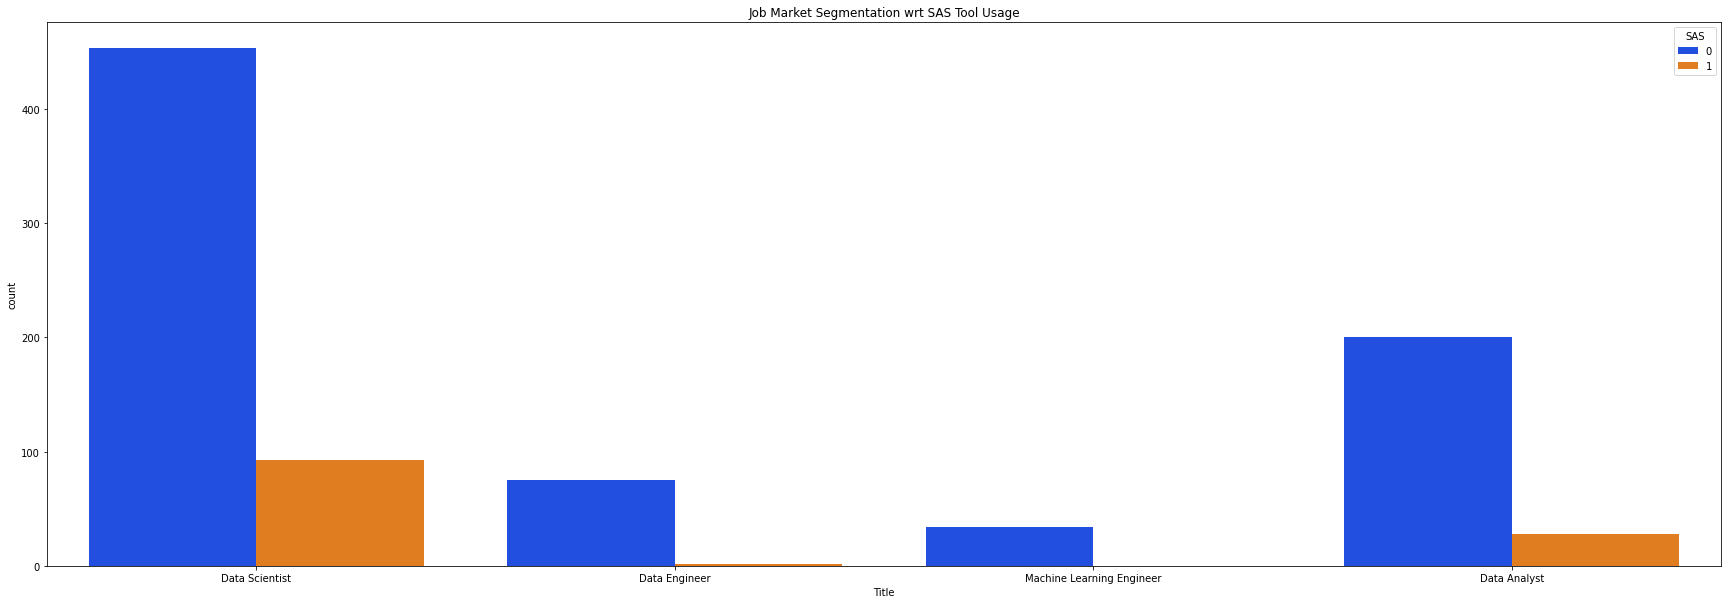

In [42]:
plt.figure(figsize=(30,10))
sns.countplot(x='Title',hue='SAS', data=df_cjd1,palette='bright')
plt.title("Job Market Segmentation wrt SAS Tool Usage")
plt.show()

## **Handling Categorical Variables**

In [43]:
df_cjd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              885 non-null    object 
 1   Job.Description    885 non-null    object 
 2   Rating             885 non-null    float64
 3   Company            885 non-null    object 
 4   LocationCity       885 non-null    object 
 5   Headquarters       885 non-null    object 
 6   Size               885 non-null    object 
 7   Founded            885 non-null    int64  
 8   Type.of.ownership  885 non-null    object 
 9   Industry           885 non-null    object 
 10  Sector             885 non-null    object 
 11  Revenue            885 non-null    object 
 12  Competitors        885 non-null    object 
 13  Python             885 non-null    int64  
 14  R Prog             885 non-null    int64  
 15  Excel              885 non-null    int64  
 16  Hadoop             885 non

In [44]:
df_cat = df_cjd1[['Title','Type.of.ownership','Sector','LocationCity']]
df_cat_copy = df_cjd1[['Title','Type.of.ownership','Sector','LocationCity']]
df_cat = df_cat.replace(to_replace = '-1', value = np.nan)
df_cat.dropna(axis=0,inplace=True)
object_col = ['Title','Type.of.ownership','Sector','LocationCity']
for col in object_col:
  le = LabelEncoder()
  le.fit(df_cat[col])
  df_cat[col] = le.transform(df_cat[col])
df_cat

,Title,Type.of.ownership,Sector,LocationCity
0,2,1,4,1
1,2,0,4,1
2,2,1,9,1
3,2,1,9,7
4,2,1,5,7
...,...,...,...,...
877,0,0,0,11
878,0,0,7,17
879,2,0,5,1
883,2,0,5,17


In [45]:
object_col = ['Title','Type.of.ownership','Sector','LocationCity']
for col in object_col:
  print(col,'-',df_cat[col].unique())

Title - [2 1 3 0]
Type.of.ownership - [1 0 2]
Sector - [ 4  9  5 11 16 17  7 14 12  1  3  0  8 15 18  6 13 10  2 19]
LocationCity - [ 1  7  4 17 13  3 20  8 18  6 19 22  9  0  5 21  2 15 14 12 11 10 23 16]


## **Clustering**

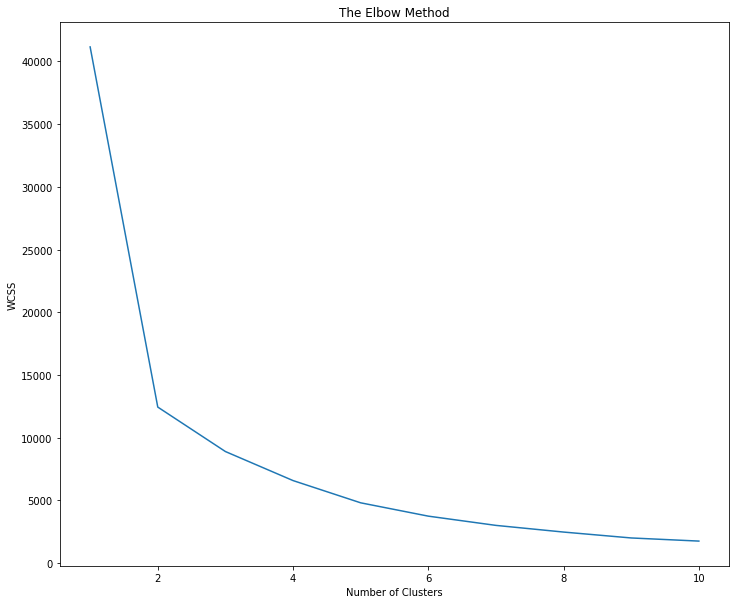

In [46]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=10)
    kmeans.fit(df_cat)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,10))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(df_cat)
  silhouette_avg = silhouette_score(df_cat, cluster_labels)
  sample_silhouette_values = silhouette_samples(df_cat, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.6565595669614545
For n_clusters = 3 The average silhouette_score is : 0.47695480939007673
For n_clusters = 4 The average silhouette_score is : 0.5326665872634249
For n_clusters = 5 The average silhouette_score is : 0.5362312491974814
For n_clusters = 6 The average silhouette_score is : 0.539780960851689


In [48]:
clust = KMeans(n_clusters=3, random_state=10)
cluster_labels_final = clust.fit_predict(df_cat)
print(cluster_labels_final)

[2 2 1 2 2 1 1 1 2 0 1 1 1 0 0 0 2 0 2 0 1 1 0 2 0 1 1 1 2 1 1 1 0 2 2 0 1
 0 0 0 1 1 0 2 2 2 0 0 0 1 1 2 1 0 2 0 2 1 2 1 2 0 0 0 2 2 1 1 1 0 0 2 0 0
 0 1 1 1 0 2 0 1 1 1 0 0 2 1 1 1 1 1 1 2 1 1 0 0 0 1 1 1 1 1 1 2 2 1 1 2 1
 1 0 2 0 1 0 1 0 2 0 0 1 1 0 1 0 1 1 2 1 2 1 2 1 1 1 1 1 1 0 1 1 1 1 1 2 0
 2 0 0 1 1 0 1 1 1 1 1 1 2 2 1 1 1 1 0 2 1 1 0 1 1 1 1 0 2 0 0 1 1 0 1 1 2
 2 1 1 1 2 1 1 1 1 1 2 0 1 1 1 0 1 0 0 1 1 1 1 0 2 2 1 0 2 1 1 1 1 1 0 1 2
 1 1 1 1 0 0 1 1 2 2 1 0 2 1 1 2 1 0 2 1 2 2 2 0 2 1 2 0 0 0 1 0 1 1 1 2 2
 2 1 0 1 1 0 1 2 1 2 1 2 0 2 0 1 1 0 1 1 2 2 1 2 0 1 1 1 2 1 1 2 1 0 2 1 1
 0 2 1 1 2 0 2 0 0 1 2 1 0 1 2 1 1 1 0 2 1 1 0 0 1 1 1 0 2 2 2 1 0 1 0 2 1
 1 1 0 2 2 0 1 0 0 1 1 2 1 1 2 0 1 2 2 2 2 0 1 2 0 1 1 1 1 0 1 1 2 0 2 0 1
 2 1 2 2 2 2 2 2 0 1 0 2 1 1 0 2 0 2 0 1 0 1 2 1 2 2 2 2 2 2 0 1 0 2 1 1 0
 2 0 2 0 1 0 1 2 1 2 2 2 2 2 2 0 1 0 2 1 1 0 2 0 2 0 1 0 1 2 1 2 2 2 2 2 2
 0 1 0 2 1 1 0 2 0 2 0 1 0 1 2 1 2 2 2 2 2 2 0 1 0 2 1 1 0 2 0 2 0 1 0 1 2
 1 2 2 2 2 2 2 0 1 0 2 1 

## **PCA Analysis**

In [49]:
pca = PCA(n_components=2)
reduced_data = pd.DataFrame(pca.fit_transform(df_cat), columns=['PC1', 'PC2'])
reduced_data['cluster'] = cluster_labels_final
reduced_data

,PC1,PC2,cluster
0,-5.487576,-4.414747,2
1,-5.485826,-4.428938,2
2,-5.869262,0.570101,1
3,0.112755,1.027850,2
4,0.418104,-2.960028,2
...,...,...,...
605,4.814448,-7.642991,2
606,10.262104,-0.206455,0
607,-5.562164,-3.431968,2
608,10.389881,-2.211303,0


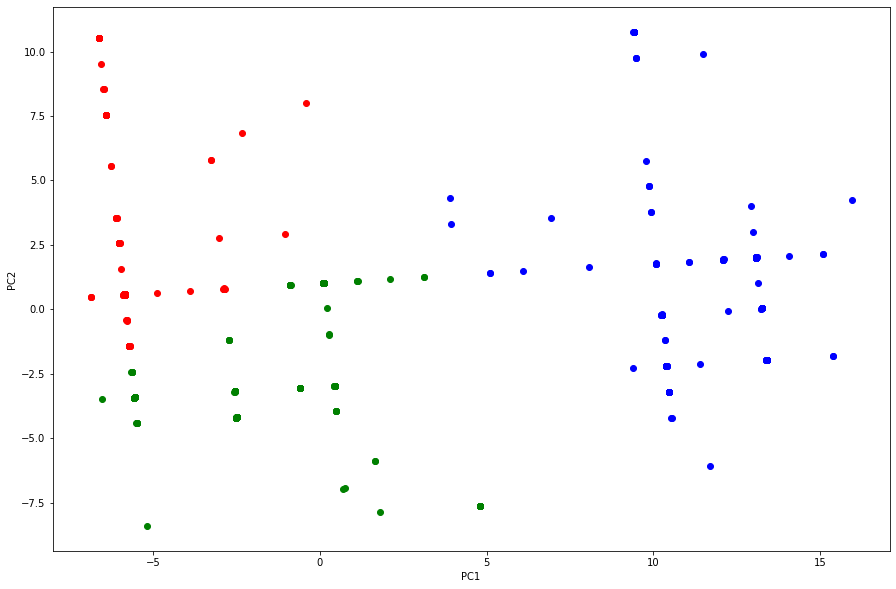

In [50]:
plt.figure(figsize=(15, 10))
plt.scatter(reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC2'], color='blue')
plt.scatter(reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC2'], color='red')
plt.scatter(reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC2'], color='green')
#plt.scatter(reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC2'], color='orange')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# **Cluster Study**

In [51]:
df_cat_copy = df_cat_copy.replace(to_replace = '-1', value = np.nan)
df_cat_copy.dropna(axis=0,inplace=True)
df_cat_copy.isna().sum()

Title                0
Type.of.ownership    0
Sector               0
LocationCity         0
dtype: int64

In [52]:
df_cat_copy['cluster'] = cluster_labels_final
df_cat_copy

,Title,Type.of.ownership,Sector,LocationCity,cluster
0,Data Scientist,Company - Public,Biotech & Pharmaceuticals,Bengaluru,2
1,Data Scientist,Company - Private,Biotech & Pharmaceuticals,Bengaluru,2
2,Data Scientist,Company - Public,Information Technology,Bengaluru,1
3,Data Scientist,Company - Public,Information Technology,Hyderabad,2
4,Data Scientist,Company - Public,Business Services,Hyderabad,2
...,...,...,...,...,...
877,Data Analyst,Company - Private,Accounting & Legal,Kochi,2
878,Data Analyst,Company - Private,Finance,Mumbai,0
879,Data Scientist,Company - Private,Business Services,Bengaluru,2
883,Data Scientist,Company - Private,Business Services,Mumbai,0


In [53]:
df_cat_copy = df_cat_copy.replace(to_replace = 'India', value = np.nan)
df_cat_copy.dropna(axis=0,inplace=True)
df_cat_copy.isna().sum()

Title                0
Type.of.ownership    0
Sector               0
LocationCity         0
cluster              0
dtype: int64

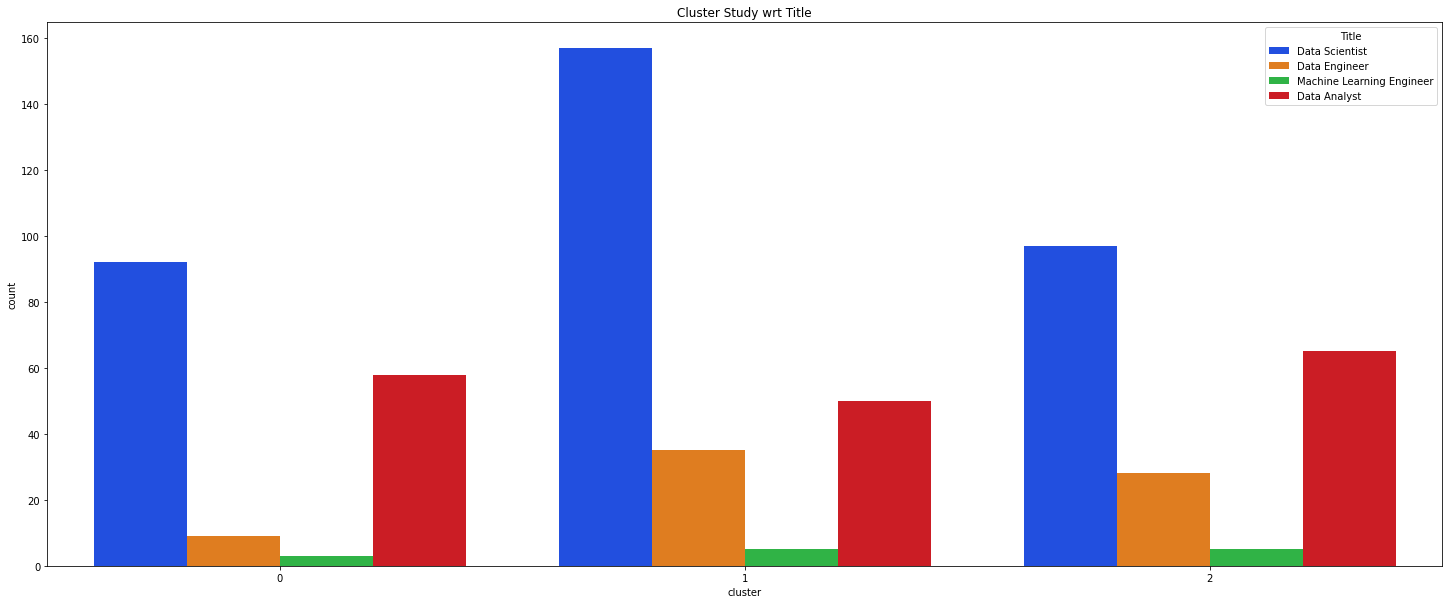

In [54]:
plt.figure(figsize=(25,10))
sns.countplot(x='cluster',hue='Title', data=df_cat_copy, palette='bright')
plt.title("Cluster Study wrt Title")
plt.show()

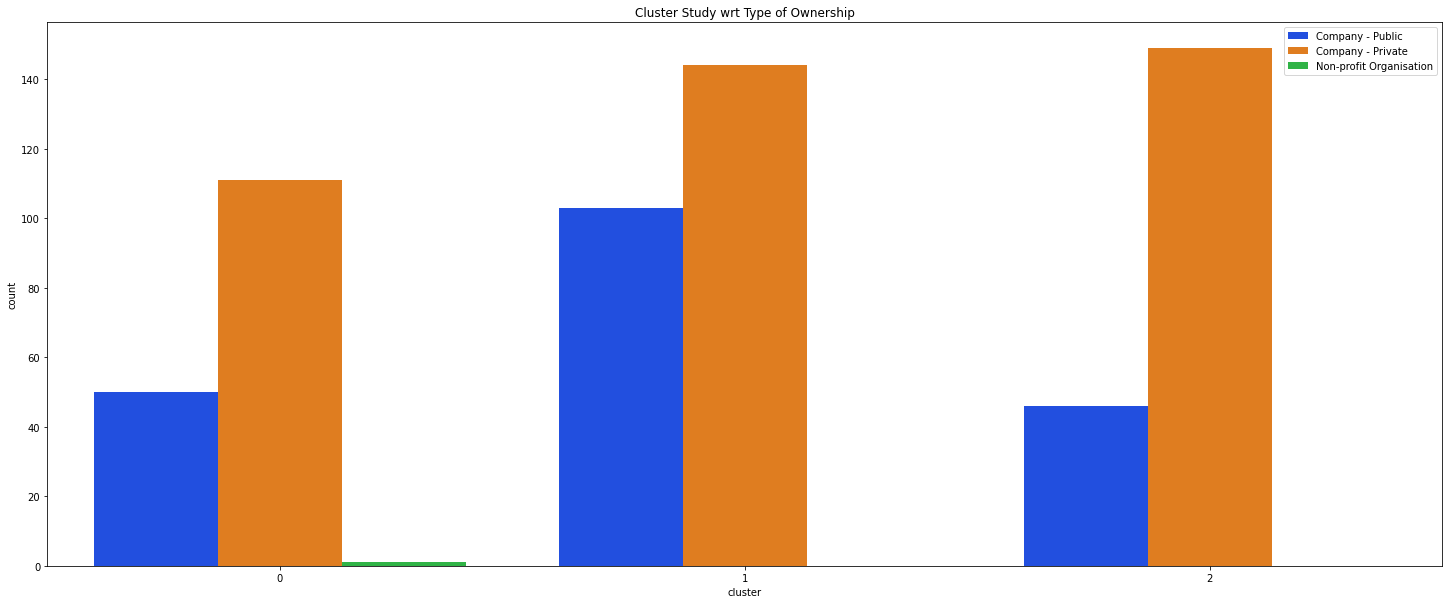

In [55]:
plt.figure(figsize=(25,10))
sns.countplot(x='cluster',hue='Type.of.ownership', data=df_cat_copy, palette = 'bright')
plt.title("Cluster Study wrt Type of Ownership")
plt.legend(loc='upper right')
plt.show()

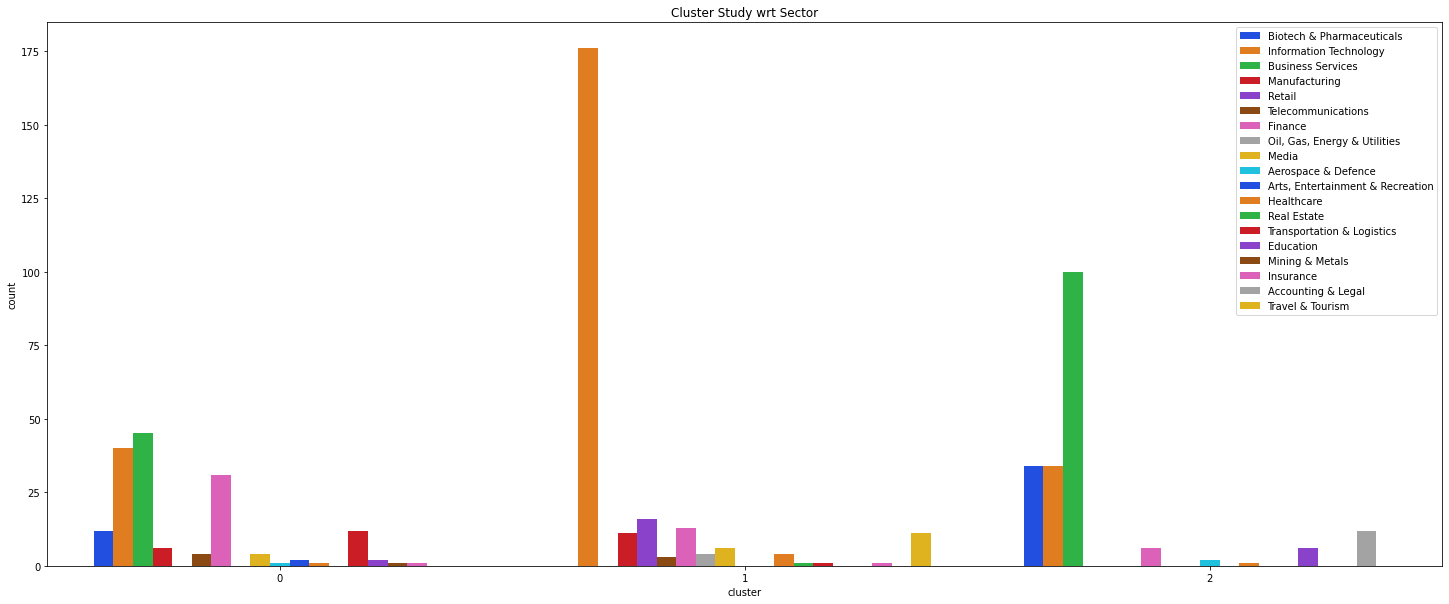

In [56]:
plt.figure(figsize=(25,10))
sns.countplot(x='cluster',hue='Sector', data=df_cat_copy,palette='bright')
plt.title("Cluster Study wrt Sector")
plt.legend(loc='upper right')
plt.show()

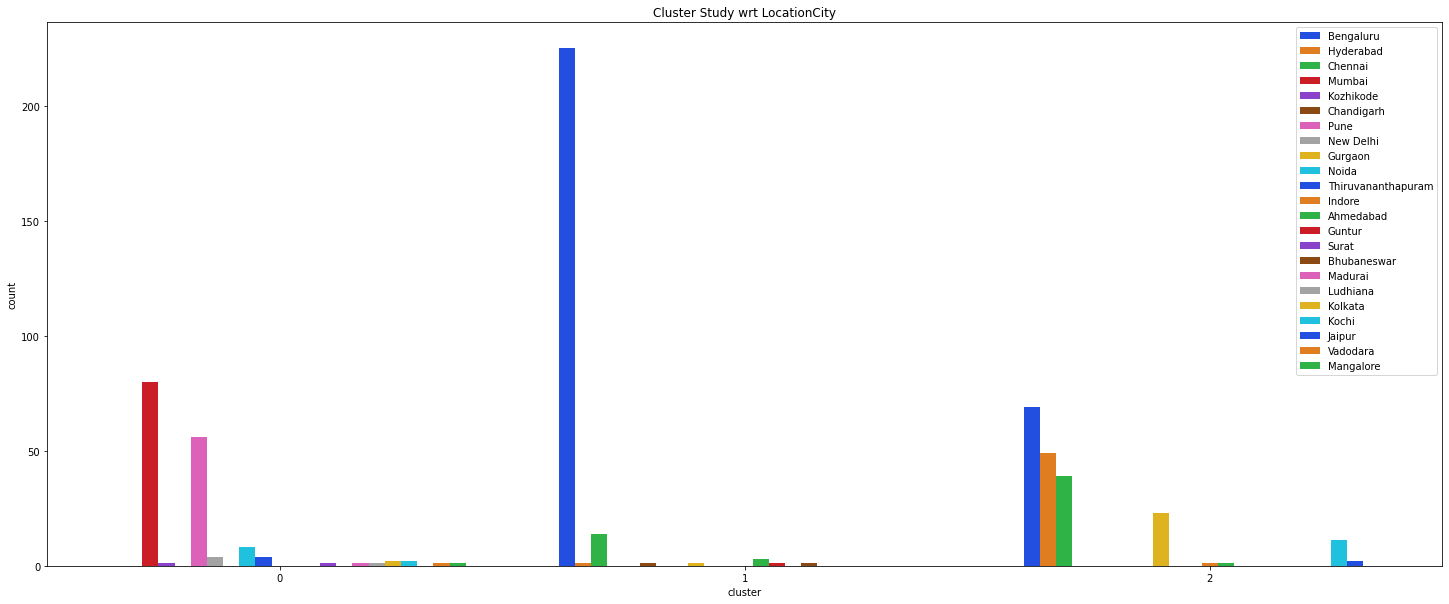

In [57]:
plt.figure(figsize=(25,10))
sns.countplot(x='cluster',hue='LocationCity', data=df_cat_copy,palette= 'bright')
plt.title("Cluster Study wrt LocationCity")
plt.legend(loc='upper right')
plt.show()

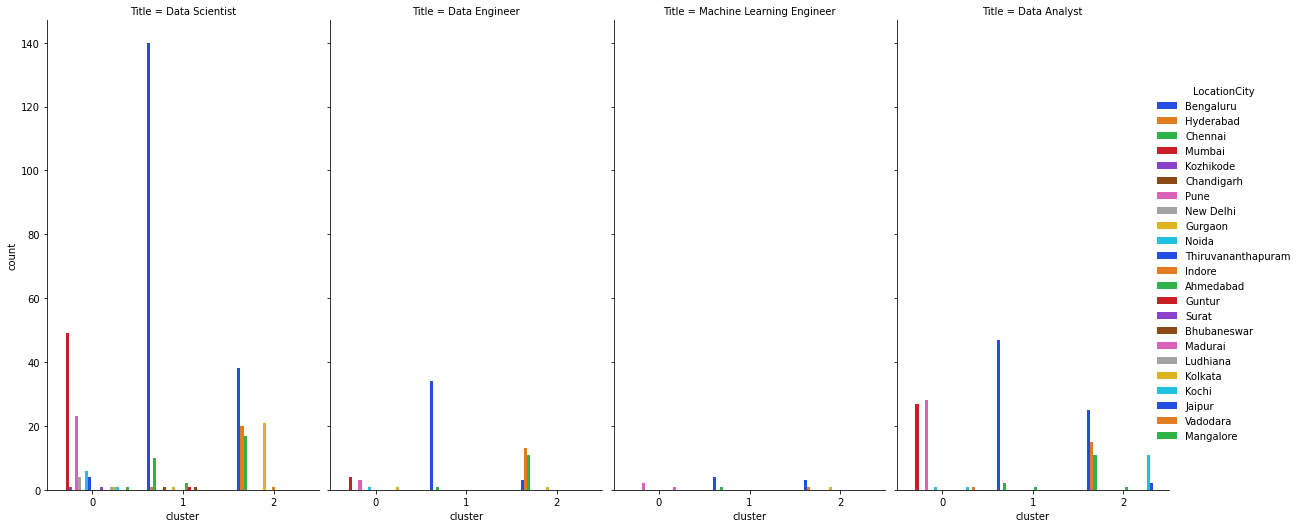

In [58]:
clust_plot=sns.catplot(x="cluster", hue="LocationCity", col="Title",data=df_cat_copy, kind="count",palette='bright')
clust_plot.fig.set_figwidth(18)
clust_plot.fig.set_figheight(8)

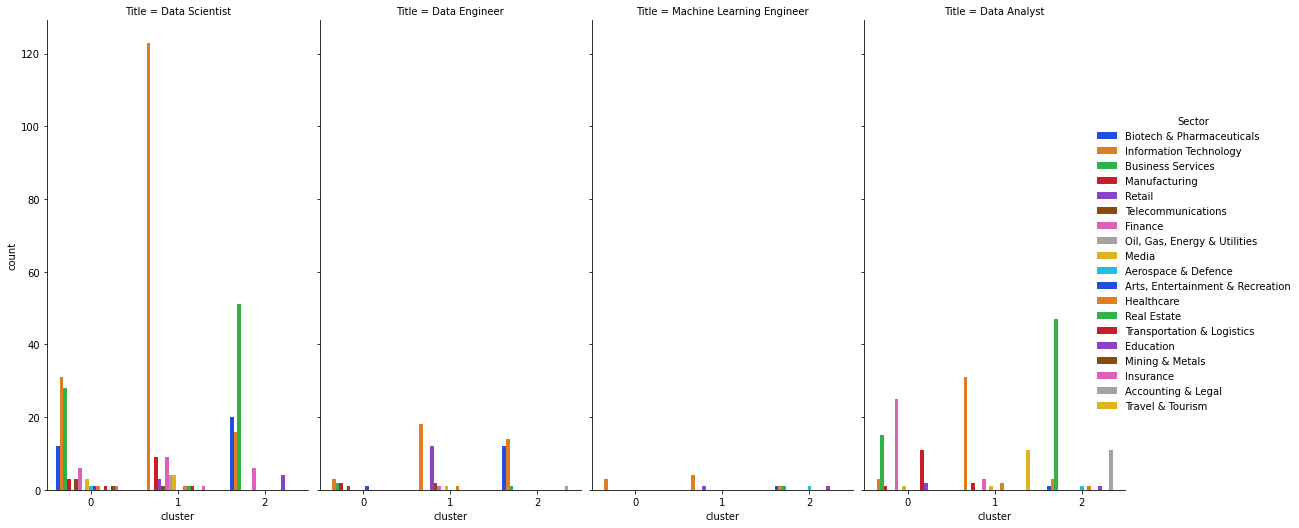

In [59]:
clust_plot=sns.catplot(x="cluster", hue="Sector", col="Title",data=df_cat_copy, kind="count",palette='bright')
clust_plot.fig.set_figwidth(18)
clust_plot.fig.set_figheight(8)

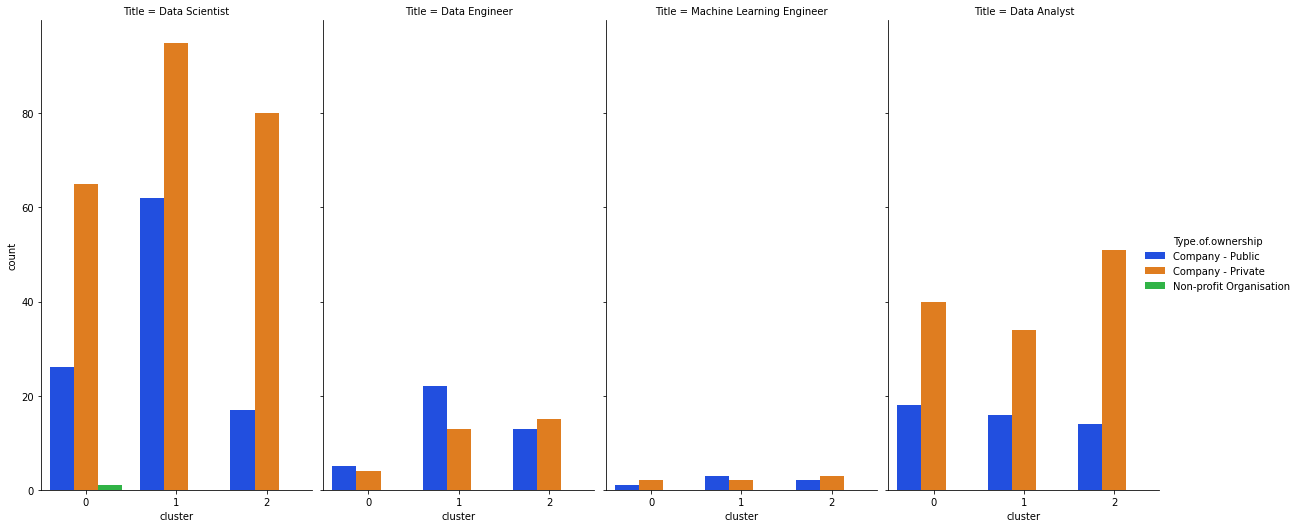

In [60]:
clust_plot=sns.catplot(x="cluster", hue="Type.of.ownership", col="Title",data=df_cat_copy, kind="count",palette='bright')
clust_plot.fig.set_figwidth(18)
clust_plot.fig.set_figheight(8)